# Adult Census Income Prediction

* Problem Statement: - Problem Statement say that we need to calculate is the Individual earns more than 50,000 dollers annually or less than 50,000
dollers annually ,According to my assumption is that Currency is in Dollers and the Period of time is One Year
* The Number Of Rows are **"32561"** And Columns are **"15"** in the dataset.

* Insight of Dataset:-
    * The Data set Contains the most people between ages of 31 to 36.
    * Individual Person Ages and Income, The majority of those who earn     more than 50,000 dollers annually are between the ages of 30 and 58 and the individual who earns less than 50,000 dollers annually are between 17 to 45

 

Data: Adult Census Dataset

github URL:-


Assumption :- Since the dataset dose not specify the Currency.I have to assumed that currency are in dollers and the period of time in one year.

Problem Statement: The Goal is to Predict whethher a person has an income of more than 50k a year or not. This is basically a binary classification problem where a person is classified into the >50k group or <=50k group.

In [1]:
# pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
# pip install --upgrade imbalanced-learn

  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.4 requires scikit-learn<1.3.0,>=1.0, but you have scikit-learn 1.3.0 which is incompatible.
creditcarddefaulter 0.0.1 requires scikit-learn==1.2, but you have scikit-learn 1.3.0 which is incompatible.
creditcarddefaulter 0.0.1 requires xgboost==1.6.2, but you have xgboost 1.7.6 which is incompatible.


In [7]:
# conda env list

# conda environments:
#
base                     C:\Users\milin\anaconda3
Iryss37                  C:\Users\milin\anaconda3\envs\Iryss37
MLflow                   C:\Users\milin\anaconda3\envs\MLflow
OIvenv                   C:\Users\milin\anaconda3\envs\OIvenv
credit37                 C:\Users\milin\anaconda3\envs\credit37
credit38                 C:\Users\milin\anaconda3\envs\credit38
credit39                 C:\Users\milin\anaconda3\envs\credit39
crime                    C:\Users\milin\anaconda3\envs\crime
iryssvenv                C:\Users\milin\anaconda3\envs\iryssvenv
vcrime                   C:\Users\milin\anaconda3\envs\vcrime
                         D:\Project\Creditcard\Credit-Card\credit38


Note: you may need to restart the kernel to use updated packages.


In [8]:
conda activate credit38


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statistics import mean
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from catboost import CatBoostClassifier

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Milind-Shende/census/main/Notebook/adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Feature Information

* **age:** Age of individuals.
* **workclass:** Employment status or type of work.
* **fnlwgt:** Final weight representing the population this row corresponds to.
* **education:** Highest level of education completed.
* **education-num:** Numeric representation of education level.
* **marital-status:** Marital status of individuals.
* **occupation:** Occupation of individuals.
* **relationship:** Relationship status or role in the family.
* **race:** Ethnicity or race of individuals.
* **sex:** Gender of individuals.
* **capital-gain:** Capital gains earned by individuals.
* **capital-loss:** Capital losses incurred by individuals.
* **hours-per-week:** Number of hours worked per week.
* **country:** Country of origin or citizenship.
* **salary:** Salary level or income bracket.

In [222]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [223]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
salary                2
dtype: int64

In [224]:
Numerical_features=[feature for feature in df.columns if df[feature].dtype!="O"]
Categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]


print(f"Numerical Features {len(Numerical_features)} and the features {Numerical_features}")
print('#'*50)
print(f"Categorical Features {len(Categorical_features)} and the features {Categorical_features}")

Numerical Features 6 and the features ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
##################################################
Categorical Features 9 and the features ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country', 'salary']


In [225]:
# Print value counts for numerical features
for feature in Numerical_features:
    print(f"Value Counts for {feature}:")
    print(df[feature].value_counts())
    print('\n' + '#' * 50 + '\n')

Value Counts for age:
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

##################################################

Value Counts for fnlwgt:
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

##################################################

Value Counts for education-num:
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

##################################################

Value Counts for capital-gain:
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: cap

In [226]:
for feature in Categorical_features:
    print(f"Value Counts for {feature}:")
    print(df[feature].value_counts())
    print("#"*50)


Value Counts for workclass:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
##################################################
Value Counts for education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
##################################################
Value Counts for marital-status:
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed  

In [227]:
for feature in Categorical_features:
    print(f"Value Counts for {feature}:")
    print(df[feature].unique())
    print("#"*50)

Value Counts for workclass:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
##################################################
Value Counts for education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
##################################################
Value Counts for marital-status:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
##################################################
Value Counts for occupation:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
###################################

In [12]:
# Remove leading and trailing whitespace from all string-type columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [14]:
df[df == '?'] = np.nan

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  country         31955 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [16]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            582
salary               0
dtype: int64

In [17]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])


In [18]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [19]:
print(df['workclass'].unique())
print(df['occupation'].unique())
print(df['country'].unique())


['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan'
 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [20]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary


In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  country         32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


###  Distribution of Salary

<=50K: 75.90742846605403, >50K: 24.092571533945968


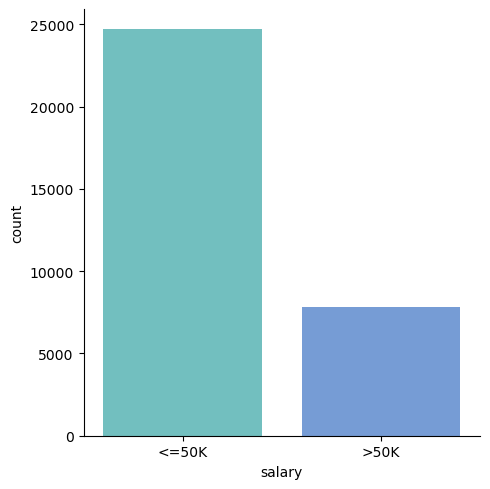

In [24]:
less_50K = (df['salary'] == '<=50K').mean() * 100
greater_50K = (df['salary'] == '>50K').mean() * 100
print("<=50K: " + str(less_50K) + ", >50K: " + str(greater_50K))
sns.catplot(data=df, x="salary", kind="count", palette="winter_r", alpha=.6)
plt.show()

<=50K: 24698, >50K: 7839


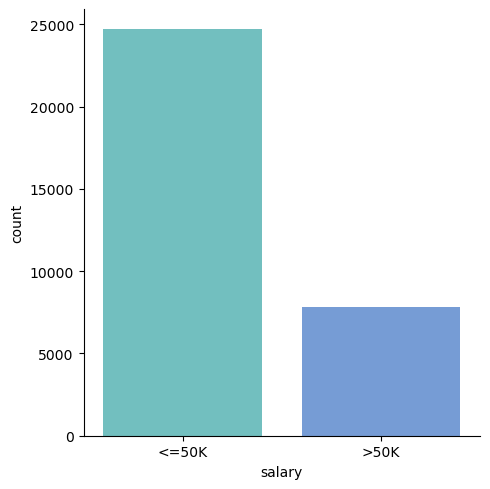

In [240]:
less_50K = df[df['salary']=='<=50K'].shape[0]
greater_50K= df[df['salary']=='>50K'].shape[0]
print("<=50K: " + str(less_50K) + ", >50K: " + str(greater_50K))
sns.catplot(data=df, x="salary", kind="count", palette="winter_r", alpha=.6)
plt.show()

In [241]:
# proportion of count data on categorical columns
for col in Numerical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

36    2.759935
31    2.729201
34    2.723054
23    2.692320
33    2.689246
        ...   
83    0.018441
88    0.009220
85    0.009220
86    0.003073
87    0.003073
Name: age, Length: 73, dtype: float64
---------------------------
164190    0.039955
123011    0.039955
203488    0.039955
148995    0.036881
113364    0.036881
            ...   
138342    0.003073
158040    0.003073
232784    0.003073
325573    0.003073
257302    0.003073
Name: fnlwgt, Length: 21648, dtype: float64
---------------------------
9     32.252513
10    22.380674
13    16.452039
14     5.292436
11     4.247472
7      3.611273
12     3.279344
6      2.867505
4      1.982359
15     1.770292
5      1.579740
8      1.330793
16     1.269324
3      1.020377
2      0.510188
1      0.153671
Name: education-num, dtype: float64
---------------------------
0        91.664874
15024     1.066478
7688      0.872852
7298      0.756062
99999     0.488674
           ...    
1111      0.003073
2538      0.003073
22040     0.0030

In [242]:
# proportion of count data on categorical columns
for col in Categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Private             75.326551
Self-emp-not-inc     7.806497
Local-gov            6.432677
State-gov            3.989304
Self-emp-inc         3.429941
Federal-gov          2.950487
Without-pay          0.043028
Never-worked         0.021514
Name: workclass, dtype: float64
---------------------------
HS-grad         32.252513
Some-college    22.380674
Bachelors       16.452039
Masters          5.292436
Assoc-voc        4.247472
11th             3.611273
Assoc-acdm       3.279344
10th             2.867505
7th-8th          1.982359
Prof-school      1.770292
9th              1.579740
12th             1.330793
Doctorate        1.269324
5th-6th          1.020377
1st-4th          0.510188
Preschool        0.153671
Name: education, dtype: float64
---------------------------
Married-civ-spouse       46.009159
Never-married            32.784215
Divorced                 13.649076
Separated                 3.150260
Widowed                   3.051910
Married-spouse-absent     1.284691
Married-AF-spo

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

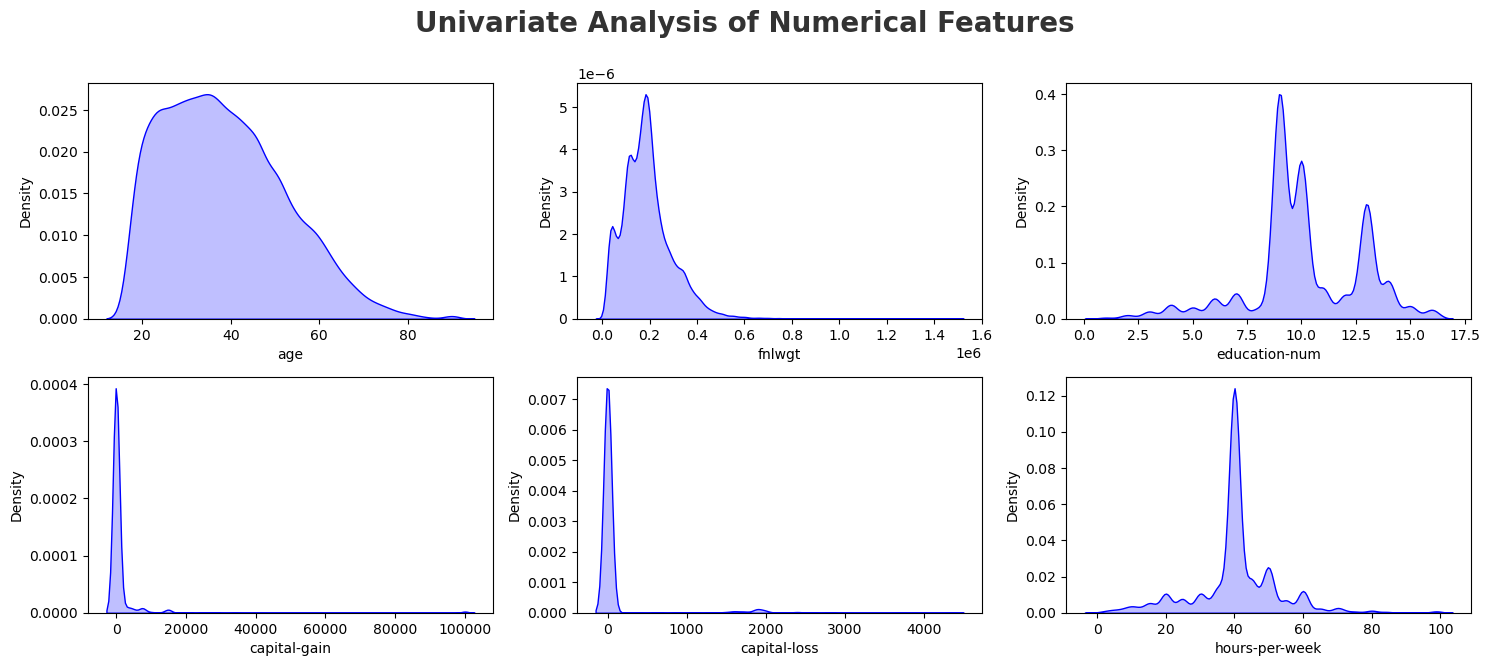

In [243]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(Numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[Numerical_features[i]],shade=True, color='b')
    plt.xlabel(Numerical_features[i])
    plt.tight_layout()

### Categorical Features

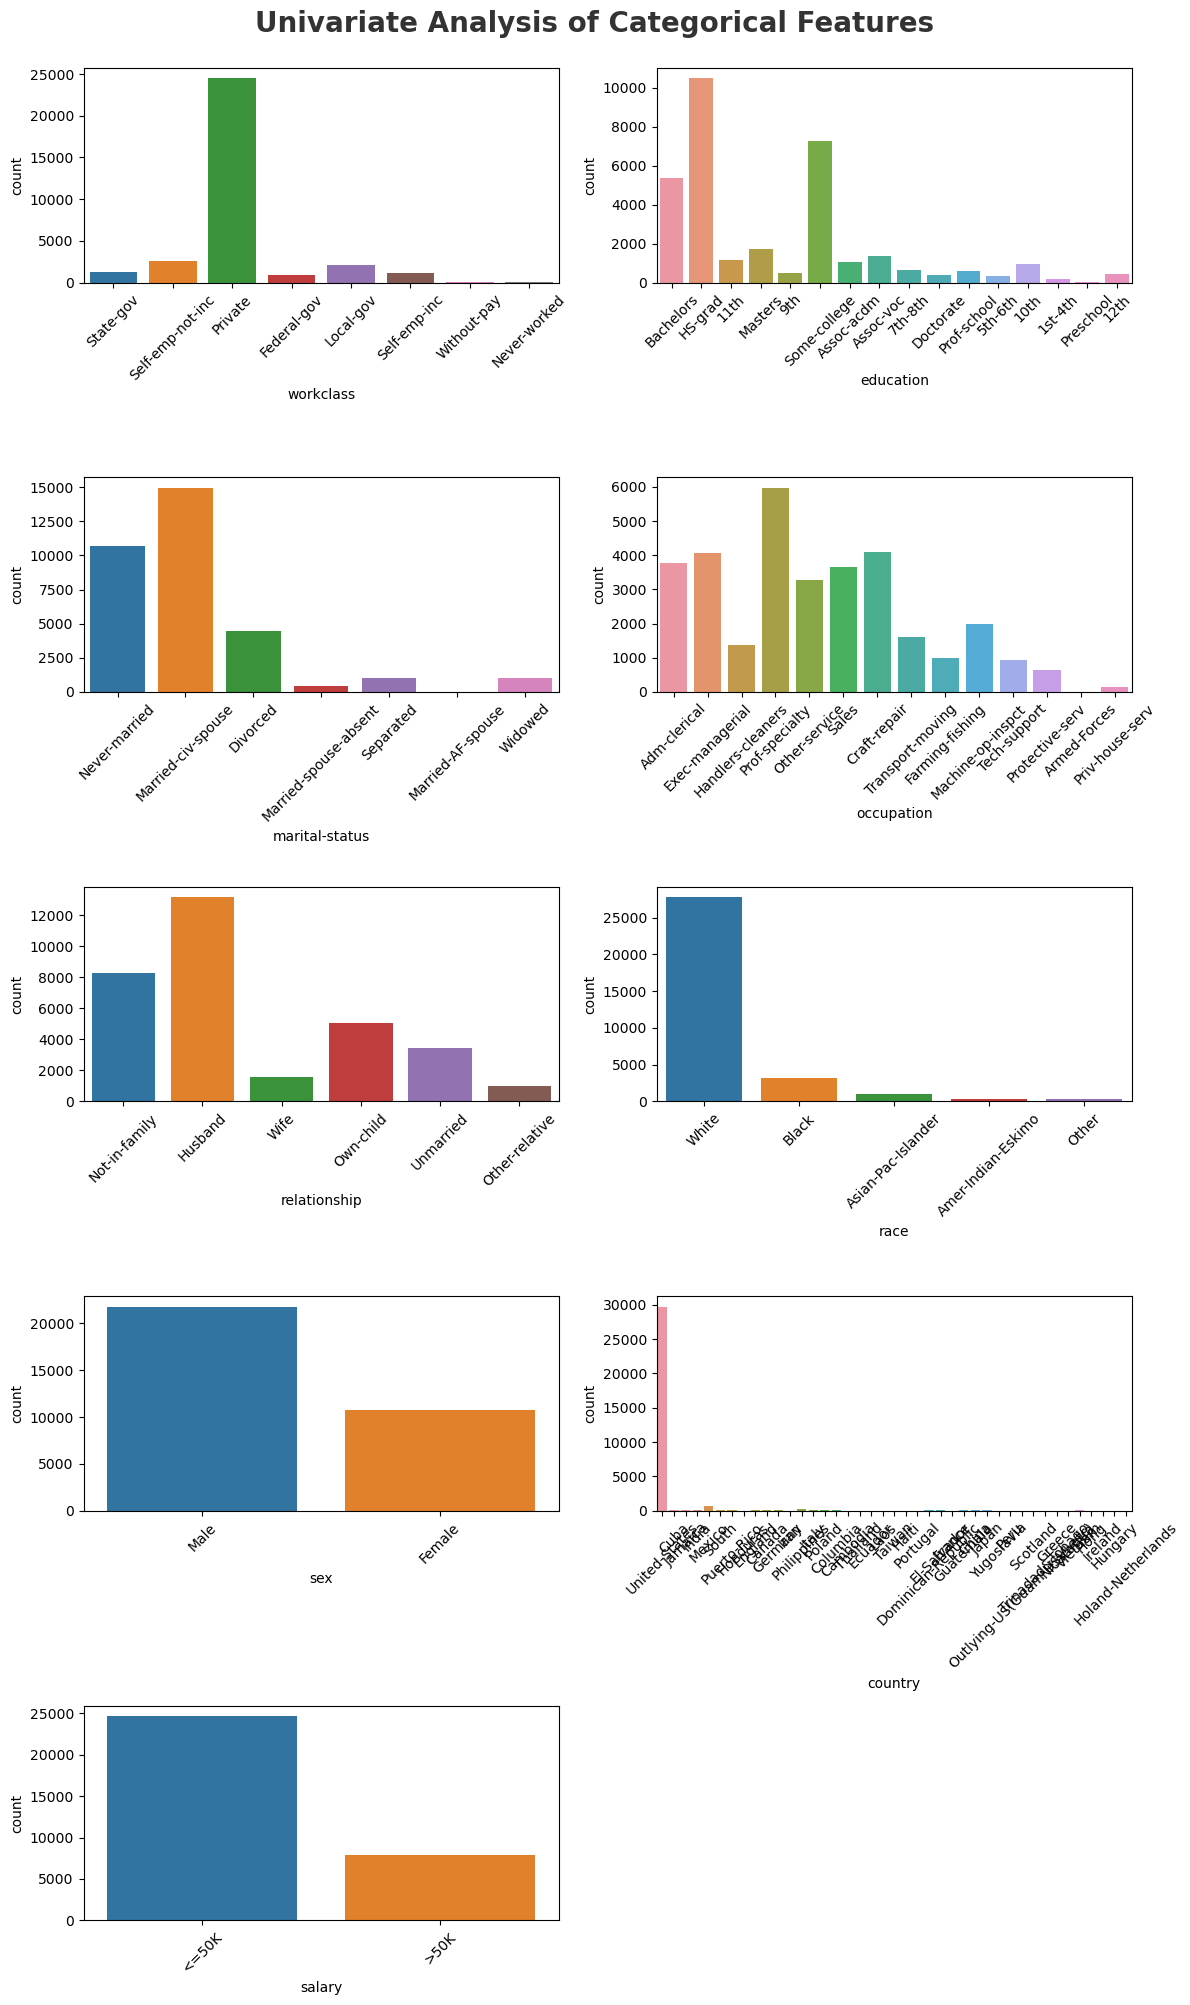

In [244]:
# categorical columns
plt.figure(figsize=(12, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
# cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(Categorical_features)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[Categorical_features[i]])
    plt.xlabel(Categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [245]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


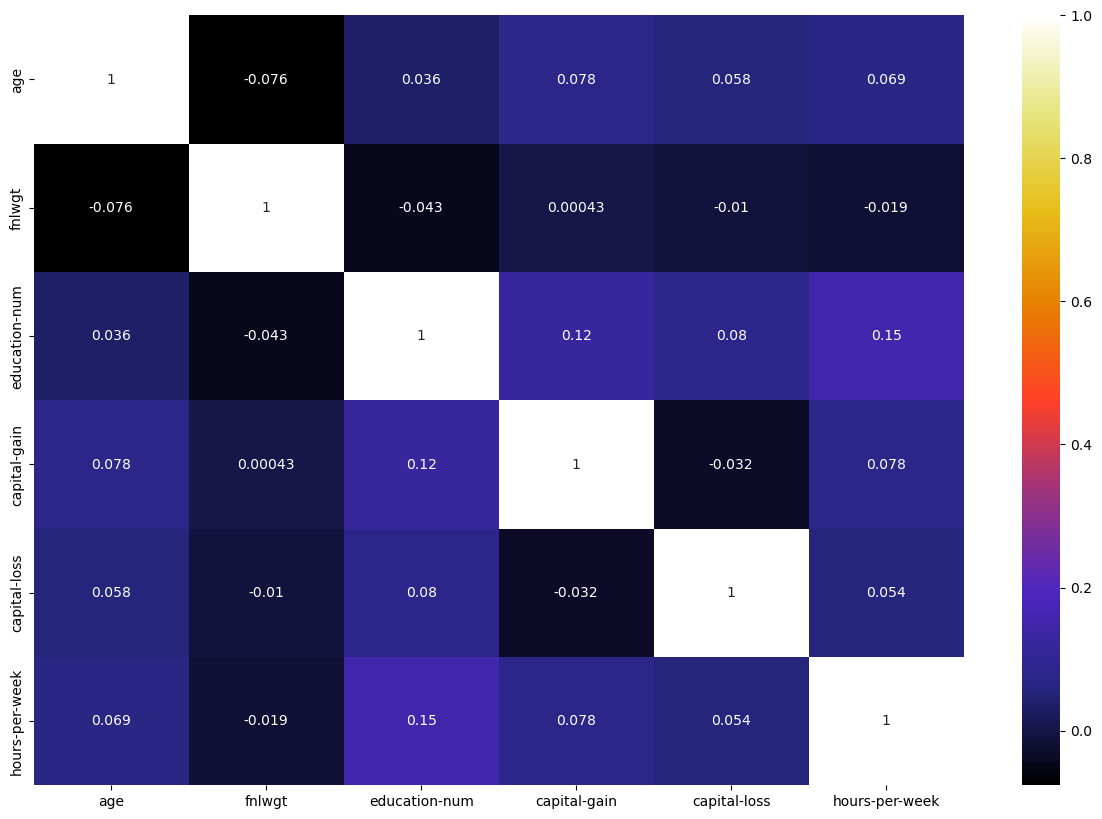

In [246]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e Salary**

In [247]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in Categorical_features:
    if chi2_contingency(pd.crosstab(df['salary'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[Categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,marital-status,Reject Null Hypothesis
3,occupation,Reject Null Hypothesis
4,relationship,Reject Null Hypothesis
5,race,Reject Null Hypothesis
6,sex,Reject Null Hypothesis
7,country,Reject Null Hypothesis
8,salary,Reject Null Hypothesis


<Axes: >

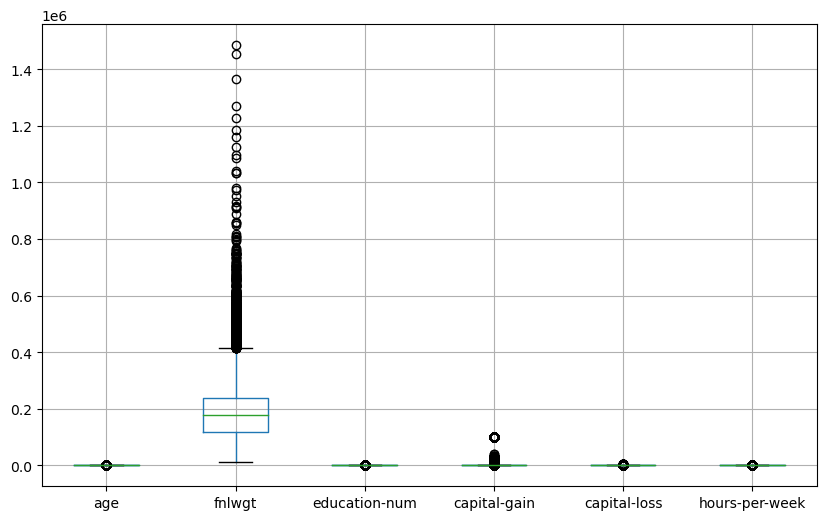

In [248]:
# Create a boxplot for numerical features
plt.figure(figsize=(10, 6))  # Set the figure size

# Use the boxplot function to create the boxplots
df.boxplot(column=Numerical_features)

#### Age

In [249]:
df['age']

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32537, dtype: int64

In [250]:
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [251]:
df['age'].describe().T

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

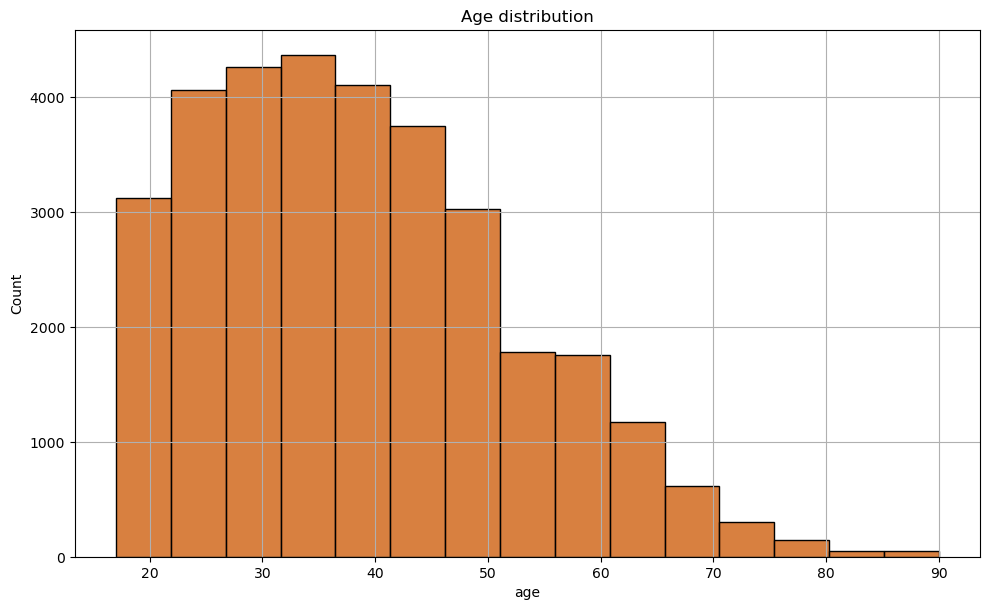

In [252]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],color='#CC5500',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

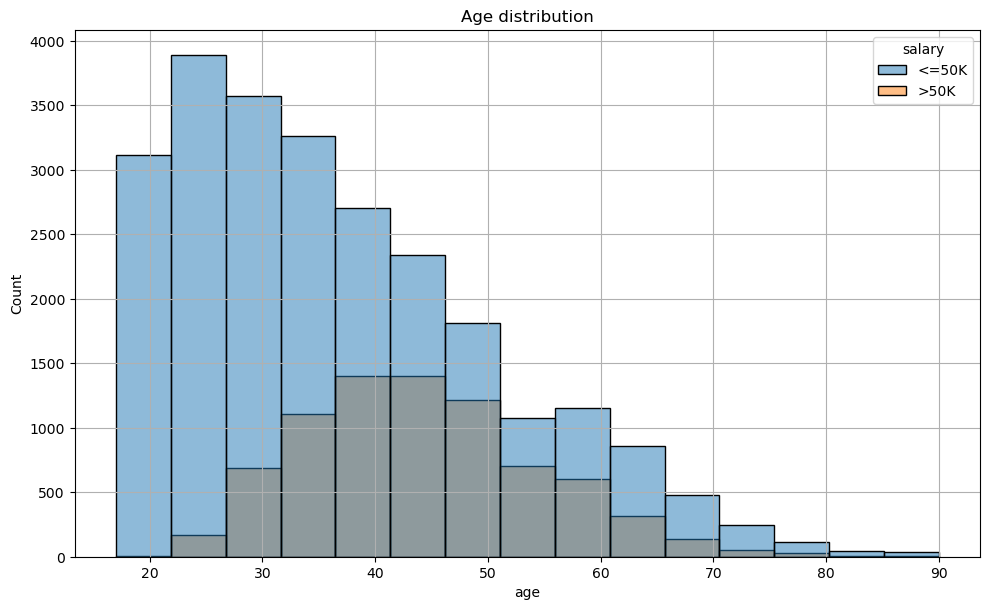

In [253]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['age'],hue=df['salary'],color='#CC5500',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

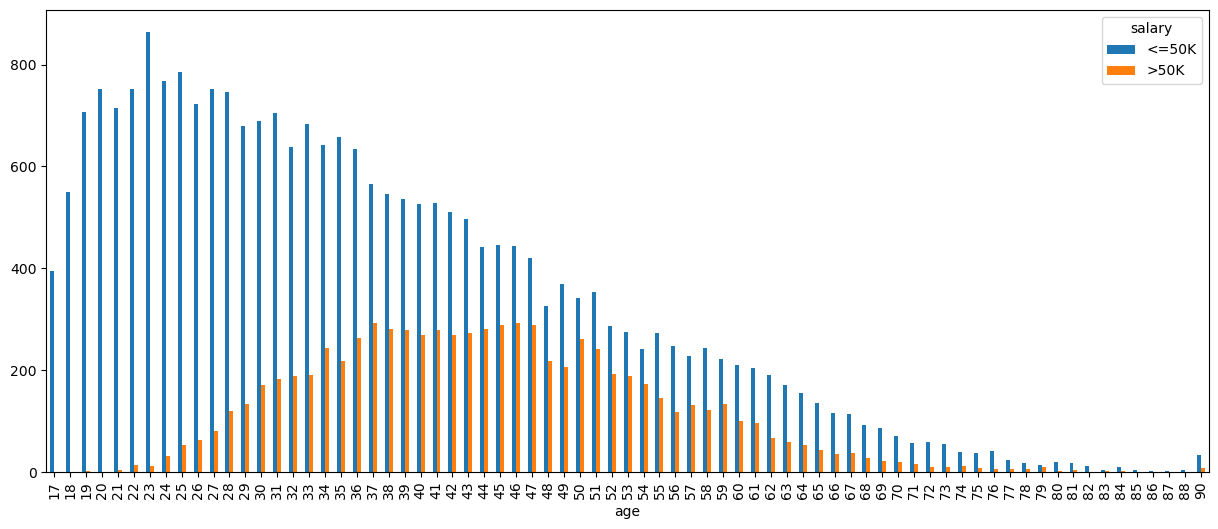

In [254]:
crosstb = pd.crosstab(df.age, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

Individual Person Ages and Income, The majority of those who earn more than 50,000 dollers annually are between the ages of 30 and 58 and the individual who earns less than 50,000 dollers annually are between 17 to 45

In [255]:
df['workclass']

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: workclass, Length: 32537, dtype: object

#### Workclass

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  country         32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


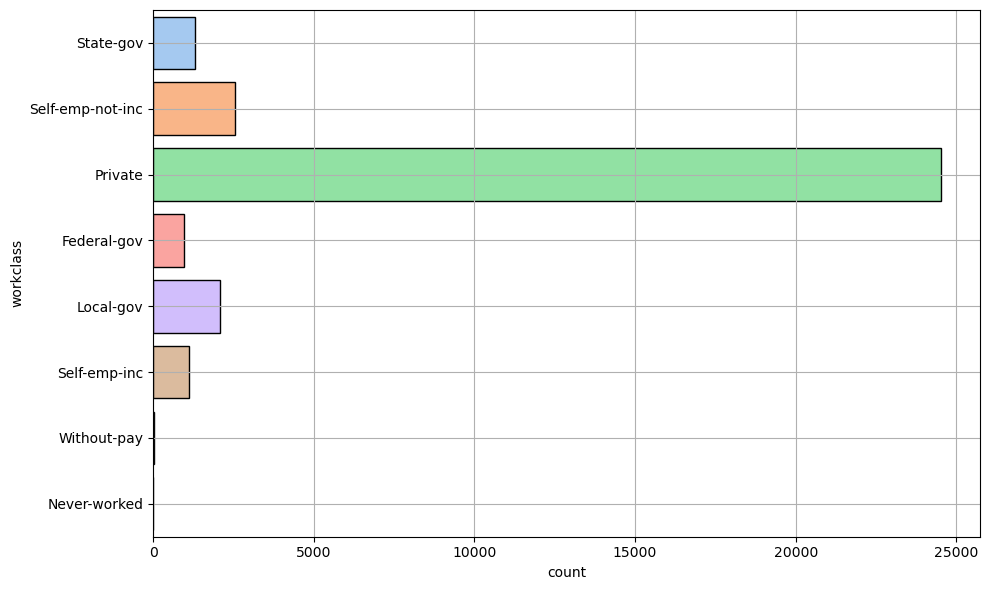

In [257]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['workclass'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

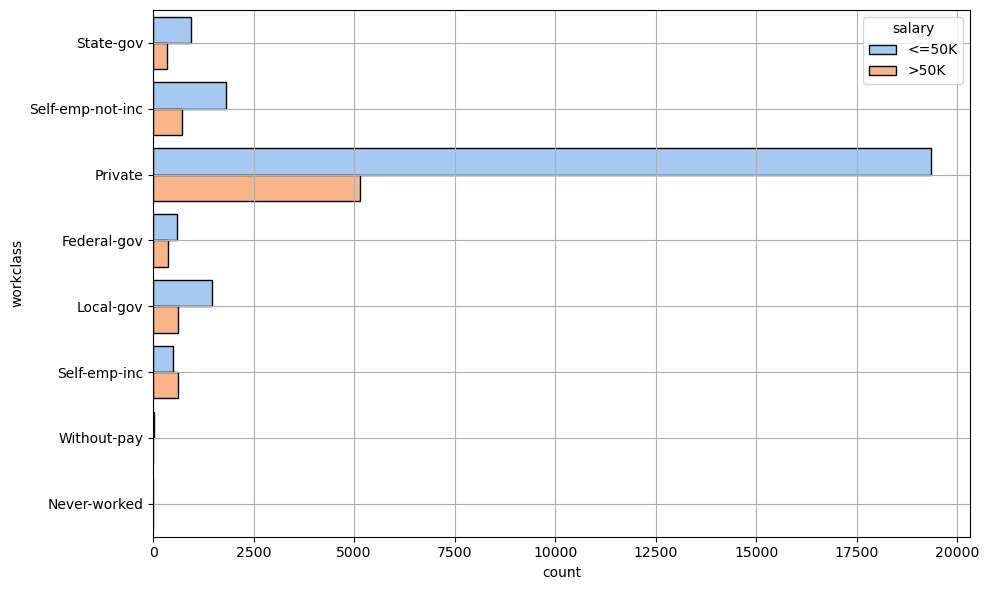

In [258]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['workclass'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [259]:
df['workclass'].value_counts()

Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [260]:
#  Private : Private
#  Self-emp-not-inc: self-employed but not incorporated.
#  Local-gov: local government entities
#  State-gov: States Government
#  Self-emp-inc: self-employed incorporated
#  Federal-gov: Federal Government
#  Without-pay: Worked without pay
#  Never-worked: Never Worked
#  ?: Unknow column

df['workclass'].replace(['Self-emp-inc'], 'Private', inplace=True)
df['workclass'].replace(['Local-gov', 'Federal-gov'], 'State-gov', inplace=True)
df['workclass'].replace(['Never-worked', 'Self-emp-not-inc'], 'Without-pay', inplace=True)



In [261]:
df['workclass'].nunique()

3

In [262]:
df['workclass'].value_counts()

Private        25625
State-gov       4351
Without-pay     2561
Name: workclass, dtype: int64

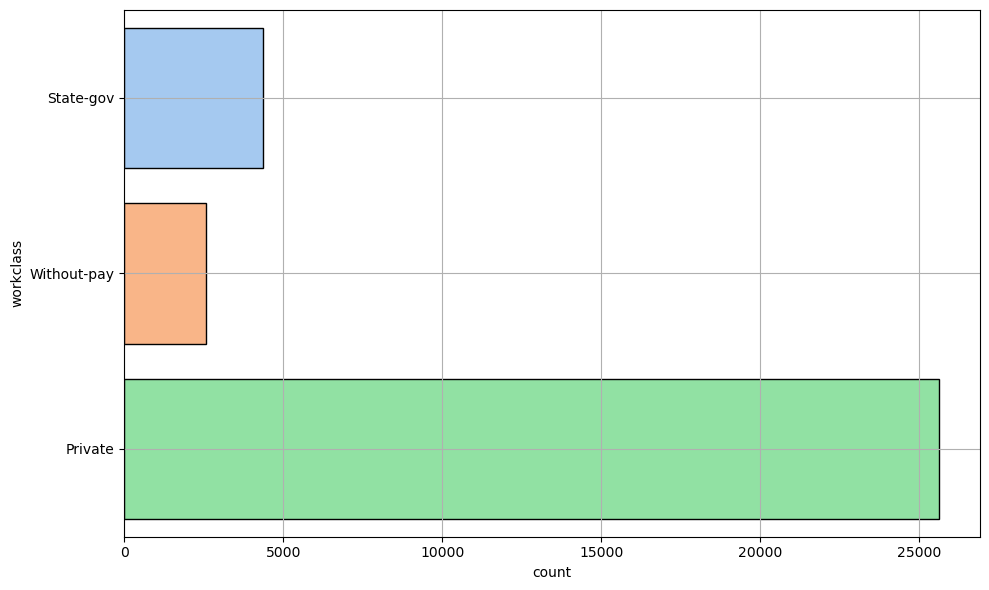

In [263]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['workclass'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

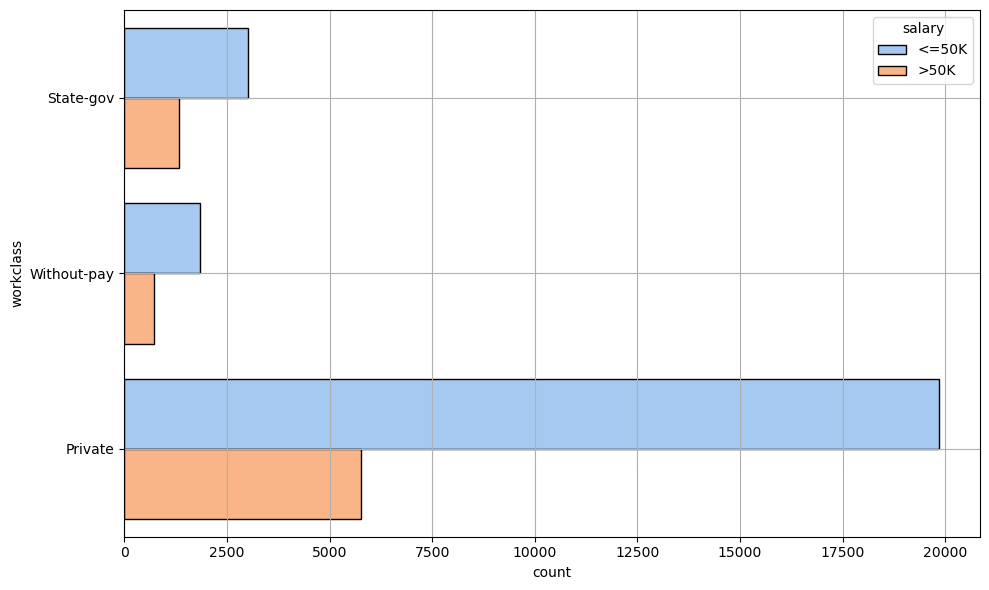

In [264]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['workclass'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

* The majority of the individuals work in the private sector. The probabilities of making above 50,000 are similar among the work classes except for State-gov and Without-pay.

* There is a workclass named as '?', which we will treat as NAN values.
and NAN values is fill with Mode

In [265]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

#### fnlwgt: Final Weight

In [266]:
df['fnlwgt']

0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name: fnlwgt, Length: 32537, dtype: int64

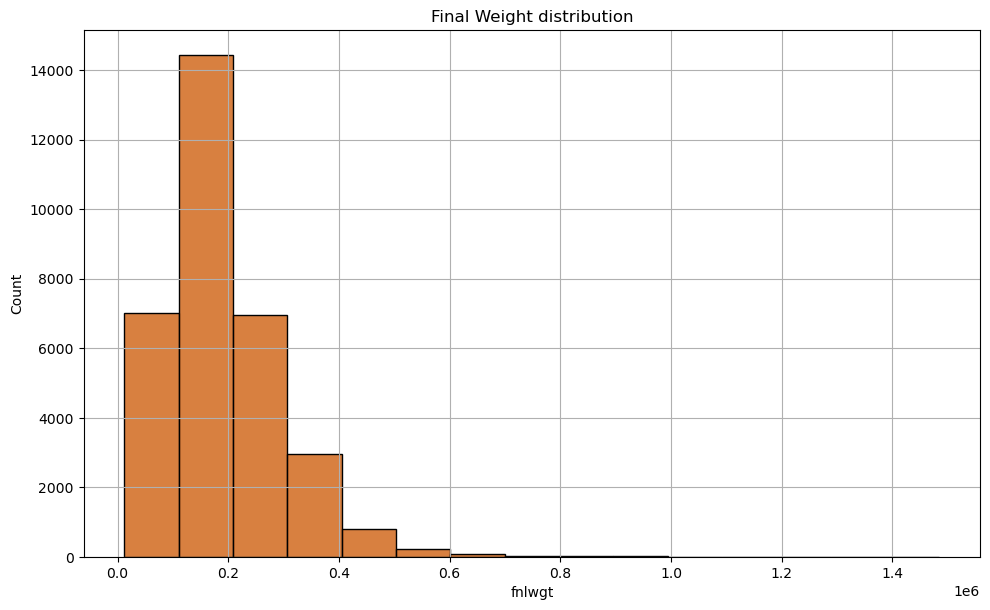

In [267]:
plt.figure(figsize=(10,6))
sns.histplot(df['fnlwgt'],color='#CC5500',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Final Weight distribution')
plt.show()

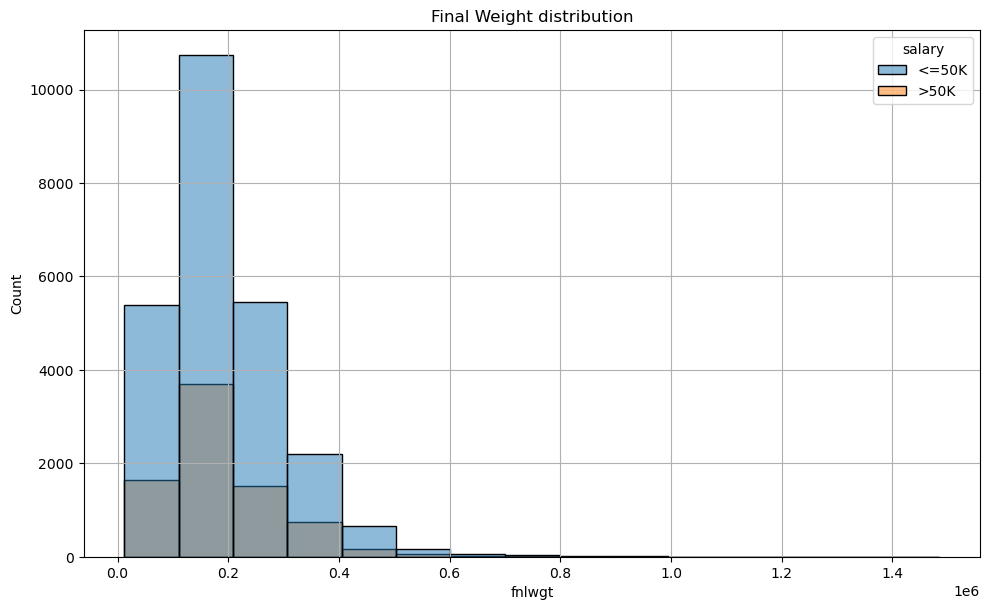

In [268]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['fnlwgt'],hue=df['salary'],color='#CC5500',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Final Weight distribution')
plt.show()

From the above graphs we can see that there doesn't exist any pattern for fnlwgt: final weight.

#### Education

In [269]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [270]:
df['education'].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

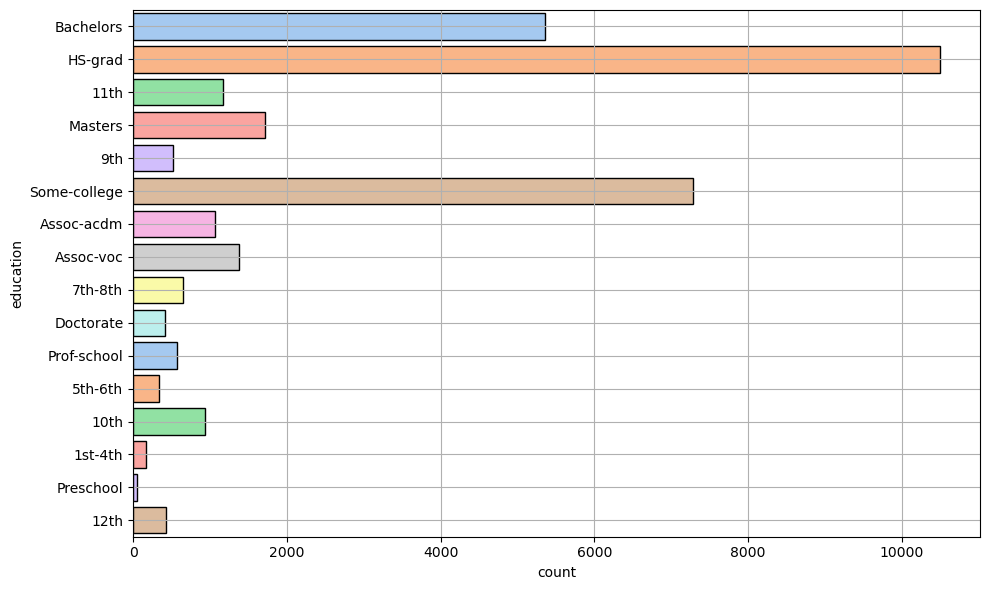

In [271]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['education'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

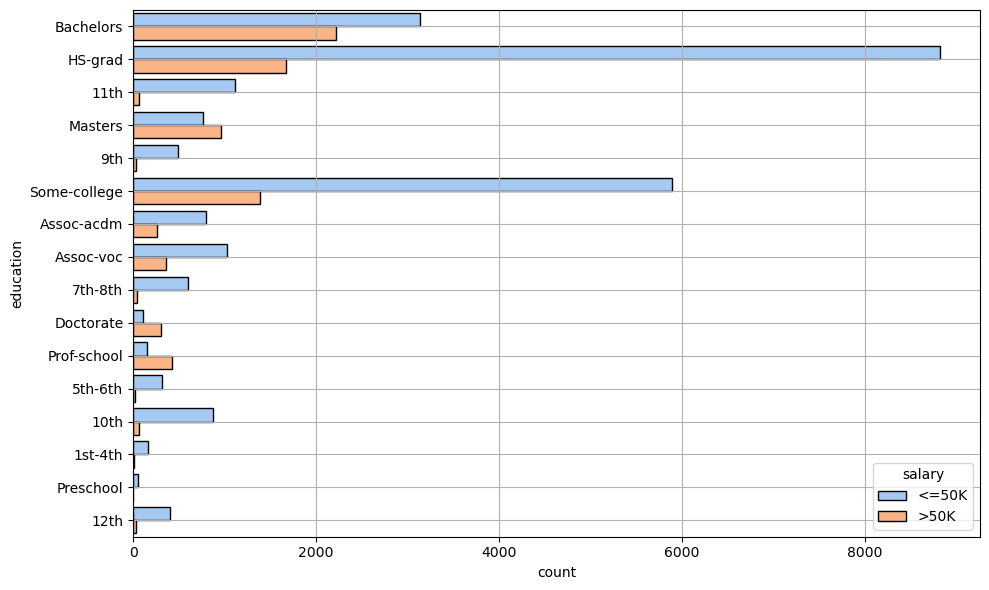

In [272]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['education'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [273]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [274]:
df['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th'], 'HS-grad', inplace=True)
df['education'].replace(['11th','12th','Some-college','Assoc-acdm','Assoc-voc'], 'JR-grad', inplace=True)
df['education'].replace(['Bachelors','Prof-school'], 'Graduate', inplace=True)
df['education'].replace(['Masters'], 'Masters', inplace=True)
df['education'].replace(['Doctorate'], 'Doctorate', inplace=True)

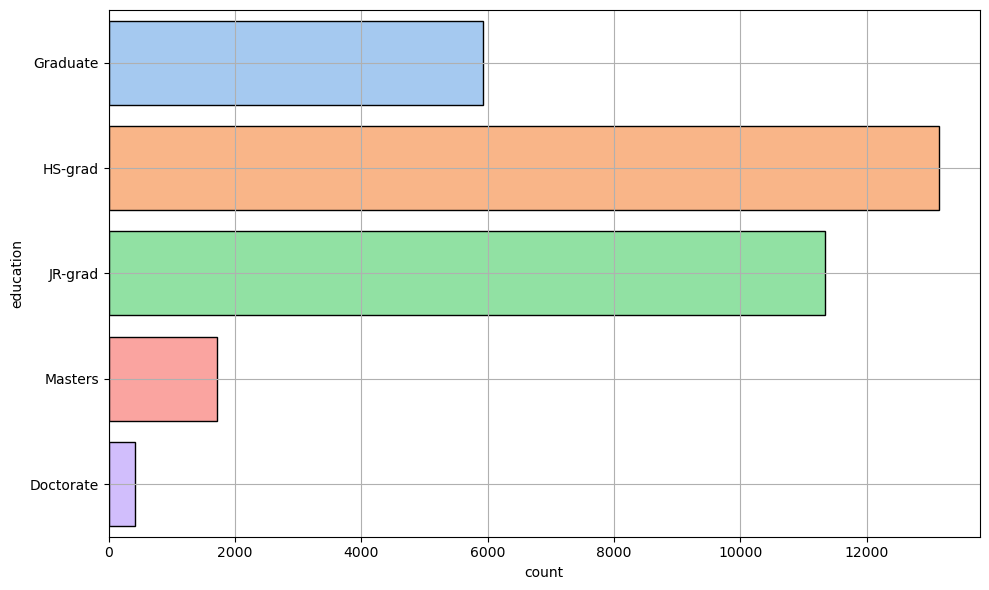

In [275]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['education'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

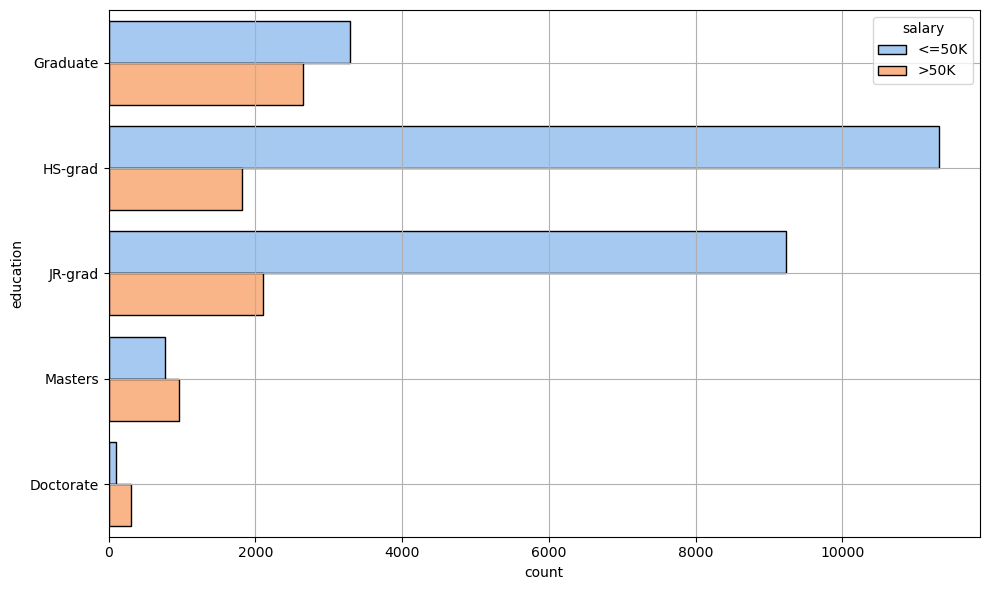

In [276]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['education'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

#### Education-num

In [277]:
df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

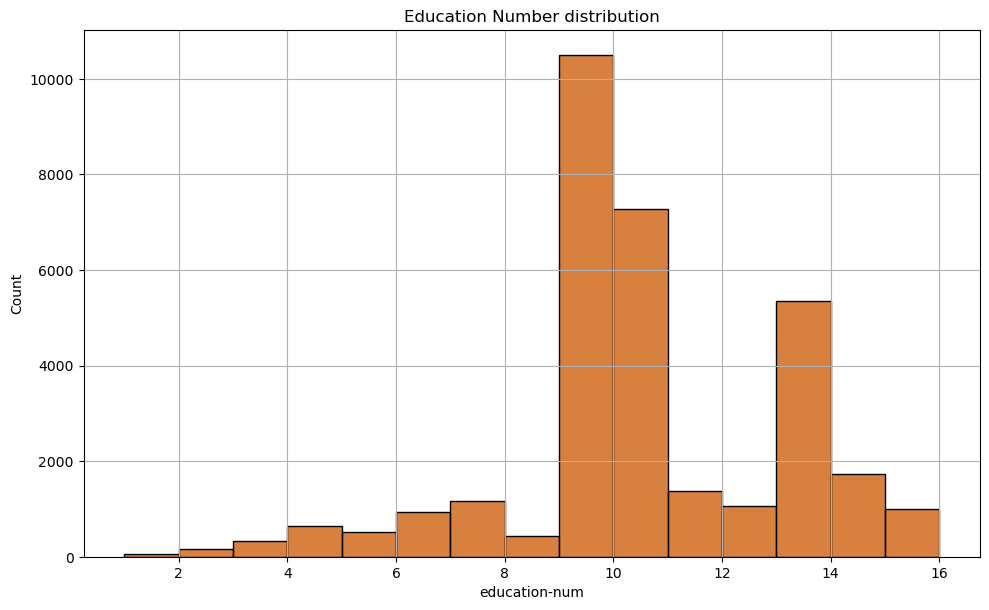

In [278]:
plt.figure(figsize=(10,6))
sns.histplot(df['education-num'],color='#CC5500',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Education Number distribution')
plt.show()

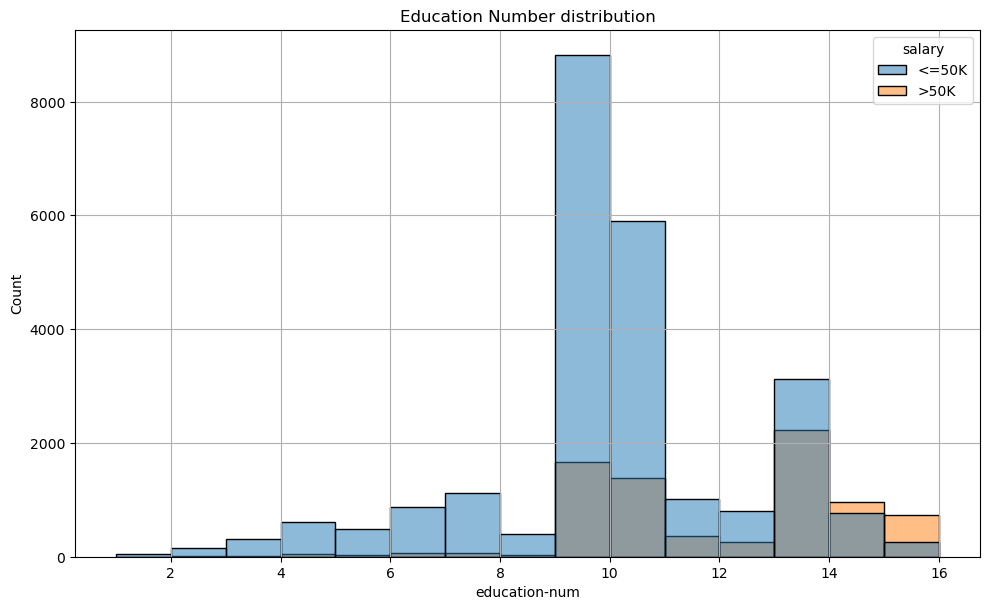

In [279]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['education-num'],hue=df['salary'],color='#CC5500',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Education Number distribution')
plt.show()

* Droped the education-num Column because it has same features as education Column

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  country         32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


#### Marital-status

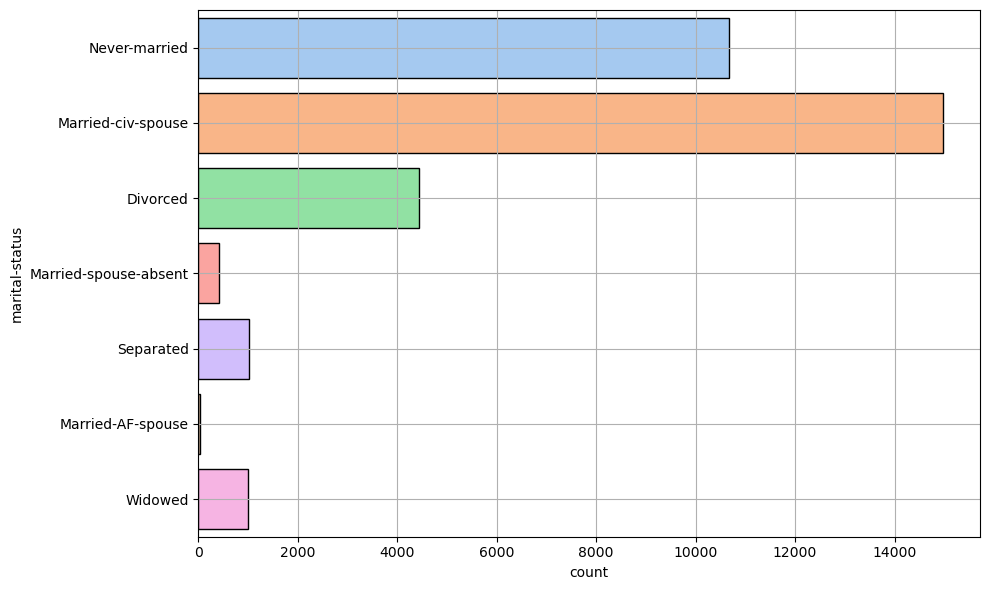

In [281]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['marital-status'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

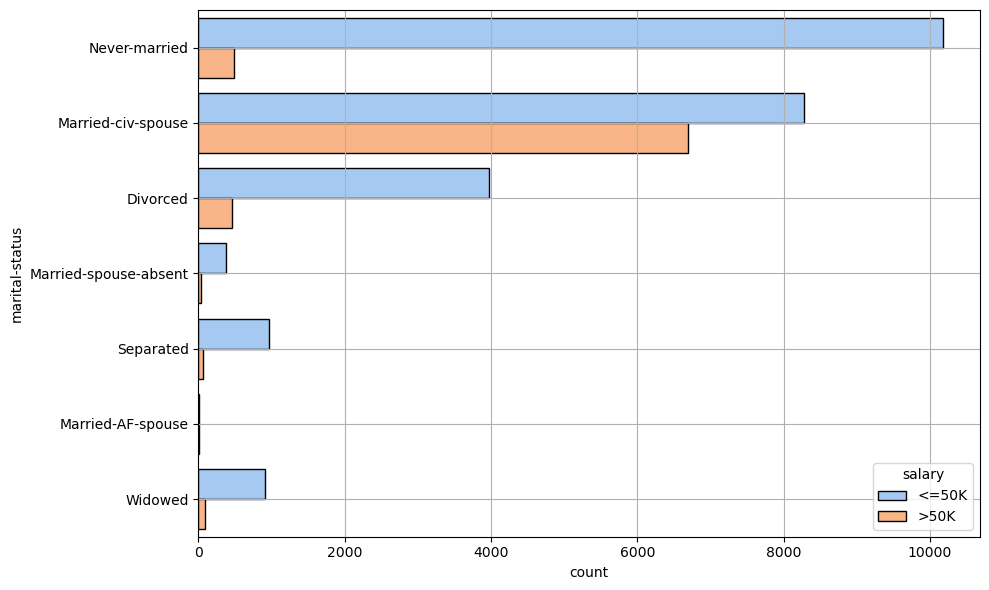

In [282]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['marital-status'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [283]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [284]:
df['marital-status'].replace(['Never-married'], 'Single', inplace=True)
df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'], 'Married', inplace=True)
df['marital-status'].replace(['Widowed','Separated','Divorced','Married-spouse-absent'], 'Divorced', inplace=True)

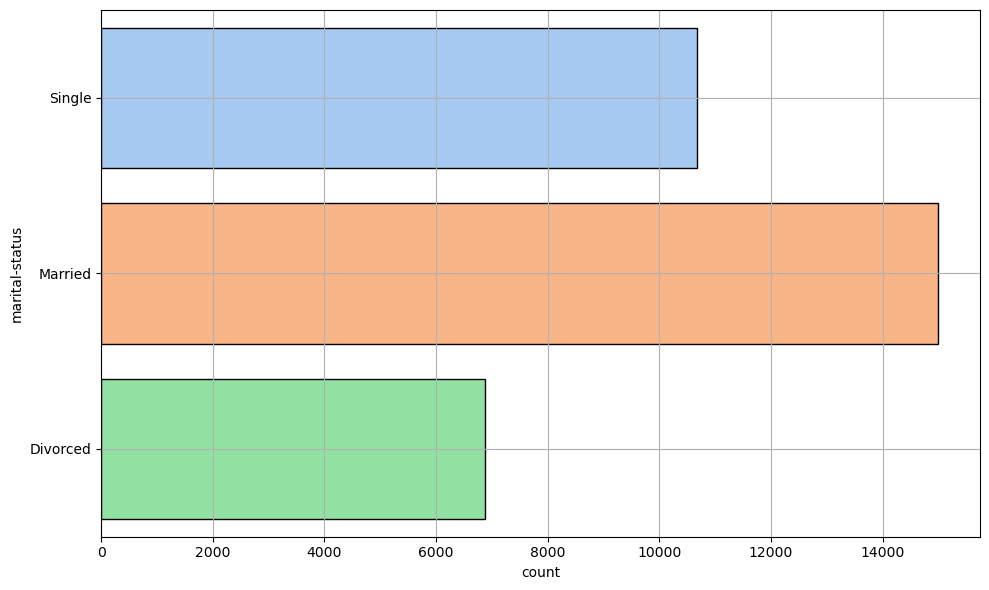

In [285]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['marital-status'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

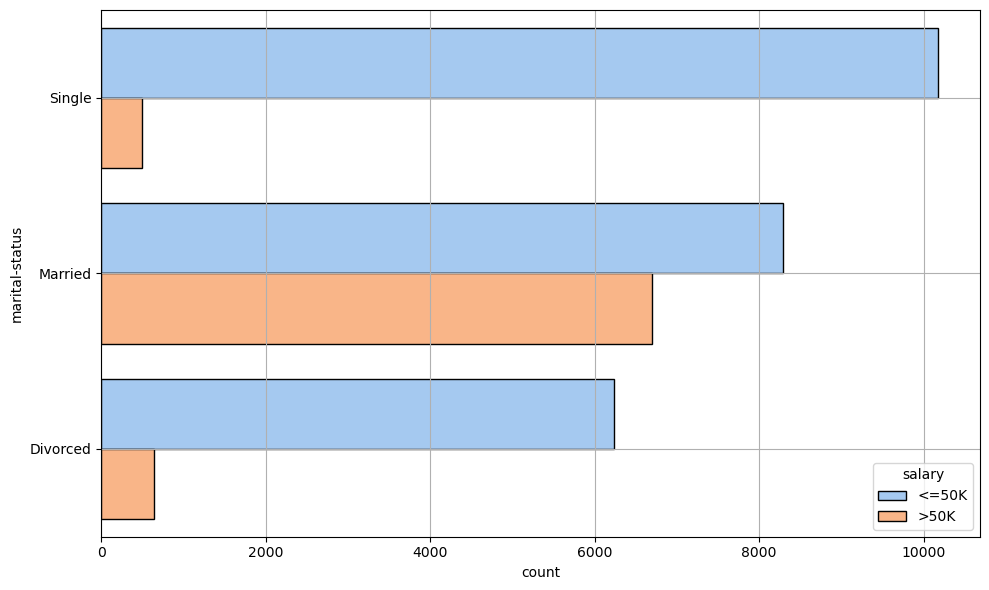

In [286]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['marital-status'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

#### Occupation

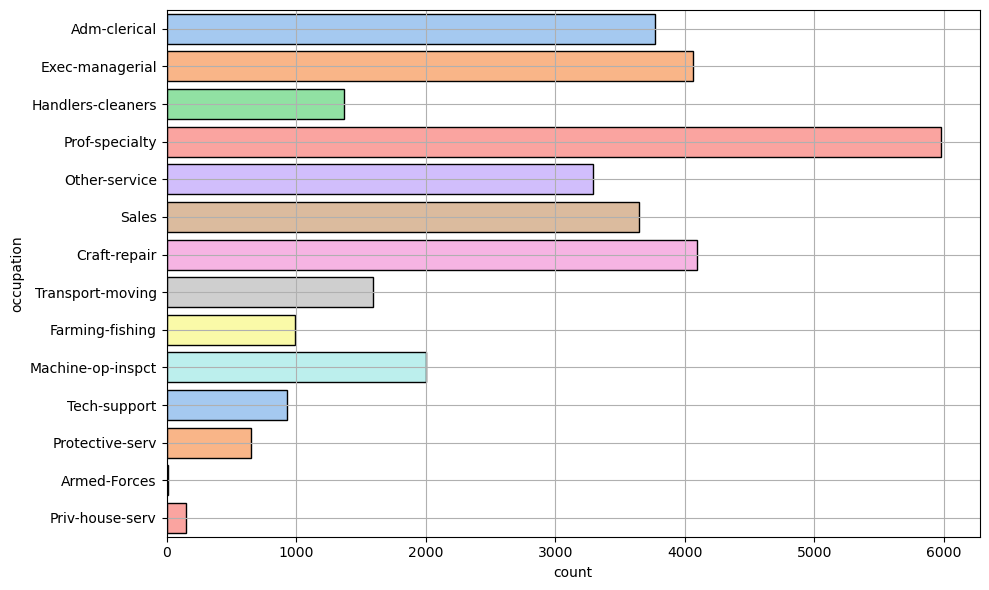

In [287]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['occupation'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

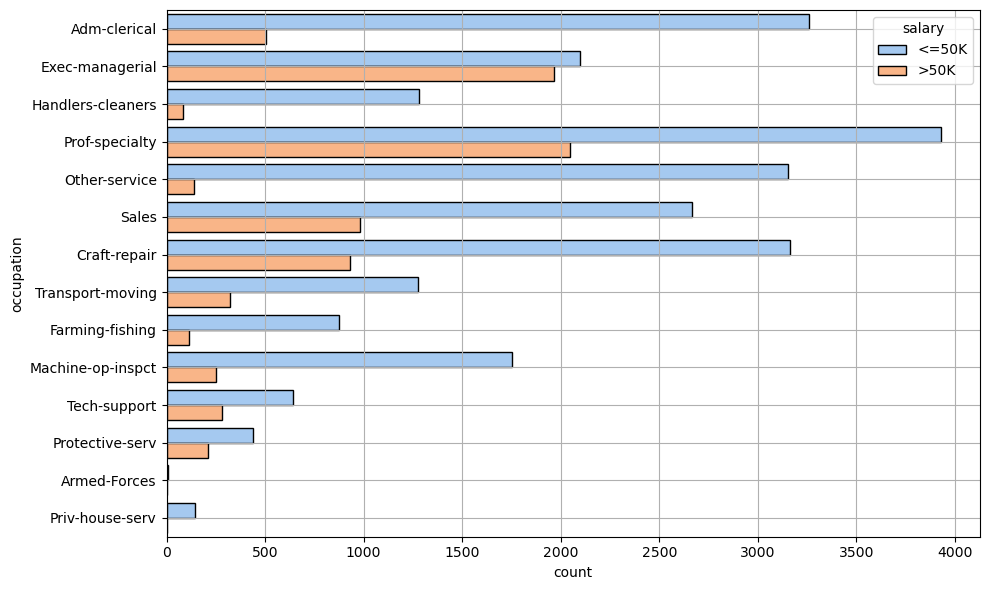

In [288]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['occupation'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [289]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [290]:
df['occupation'].replace(['Priv-house-serv','Handlers-cleaners','Other-service'],'Other-service',inplace=True)
df['occupation'].replace(['Prof-specialty','Tech-support'],'Prof-specialty',inplace=True)

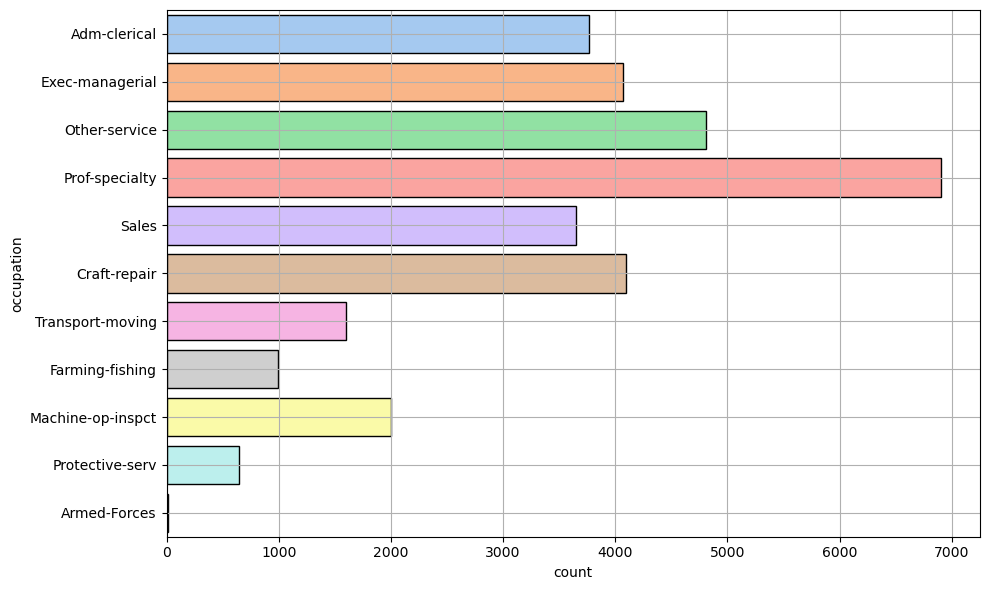

In [291]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['occupation'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

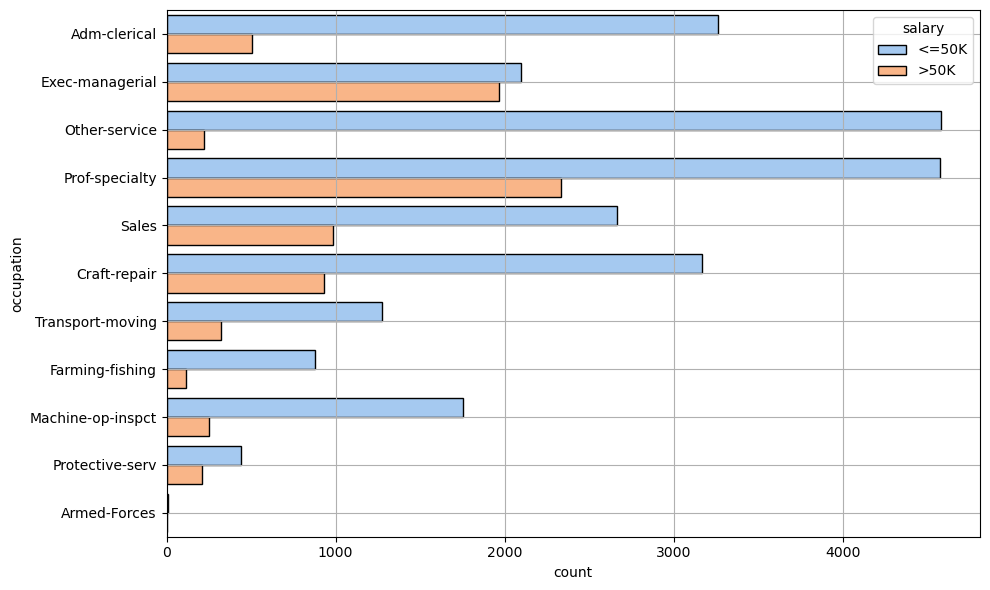

In [292]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['occupation'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  country         32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


#### Relationship

In [294]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

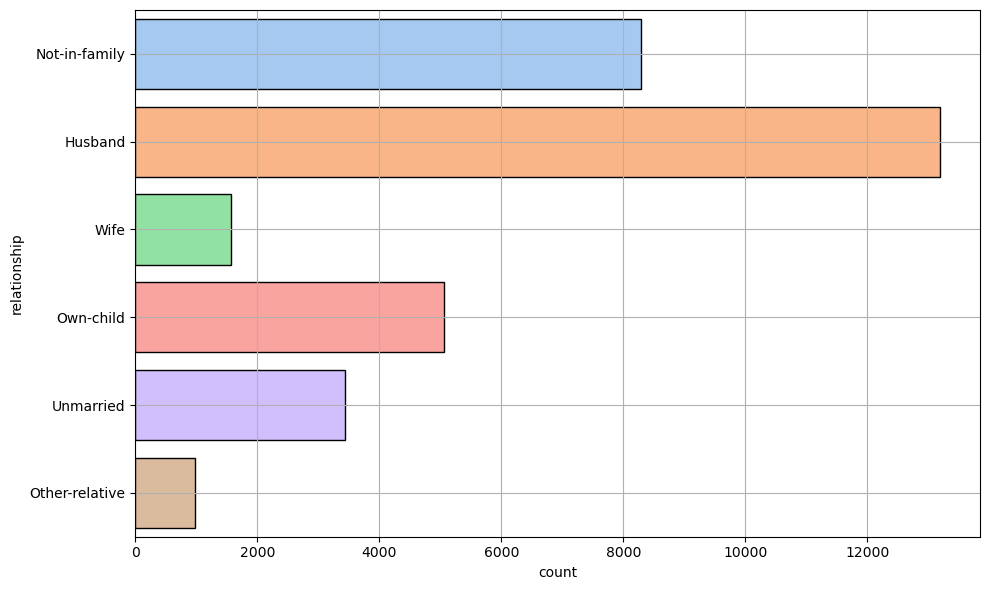

In [295]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['relationship'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

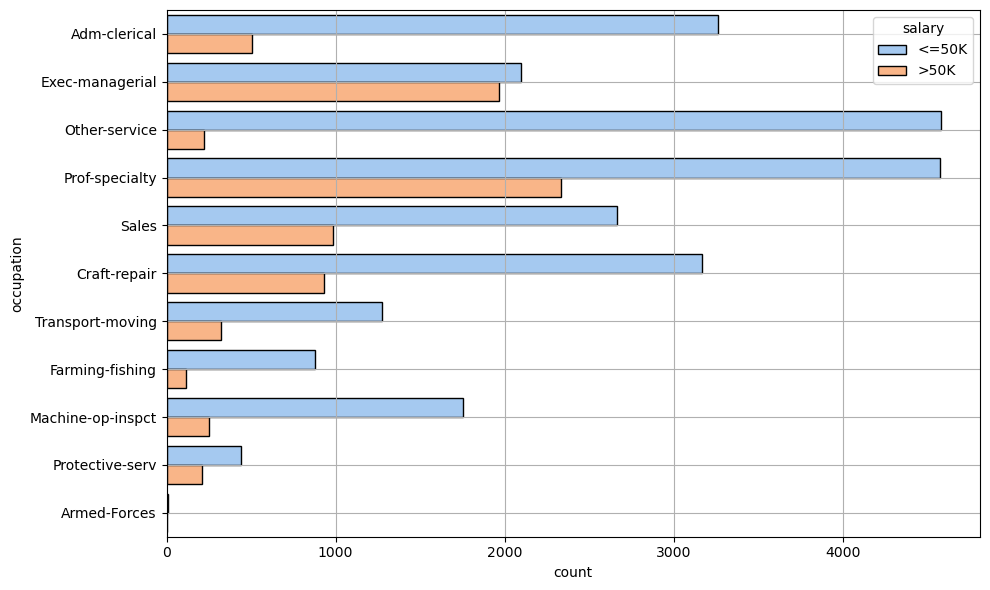

In [296]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['occupation'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [297]:
df['relationship'].replace(['Husband','Wife','Own-child'],'Married',inplace=True)
df['relationship'].replace(['Not-in-family','Other-relative'],'Relative',inplace=True)
df['relationship'].replace(['Unmarried'],'Unmarried',inplace=True)

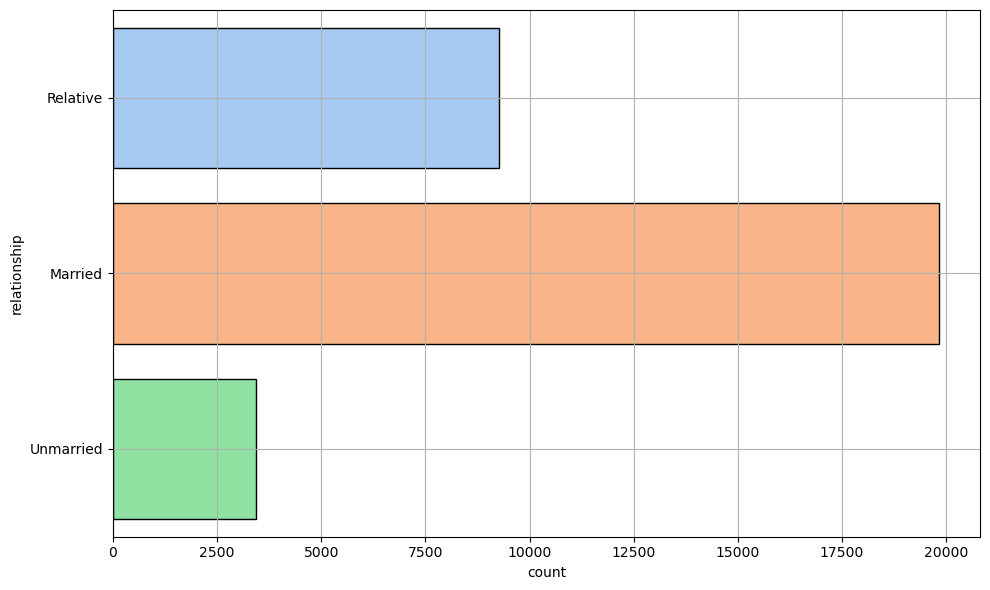

In [298]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['relationship'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

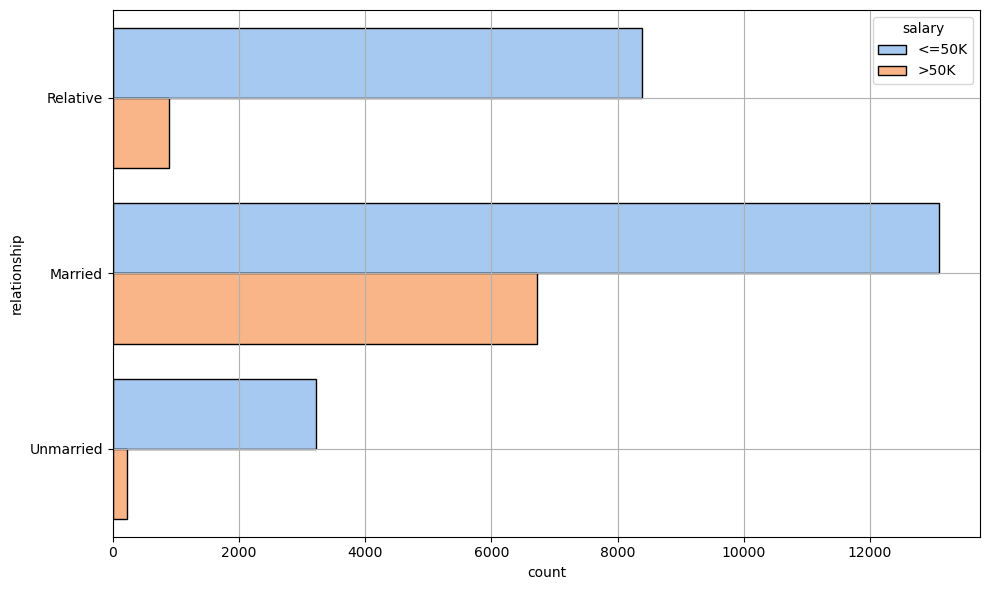

In [299]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['relationship'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

* Relationship column has same features as Marital-Status so we can drop Relationship column

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  country         32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


#### Race

In [301]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

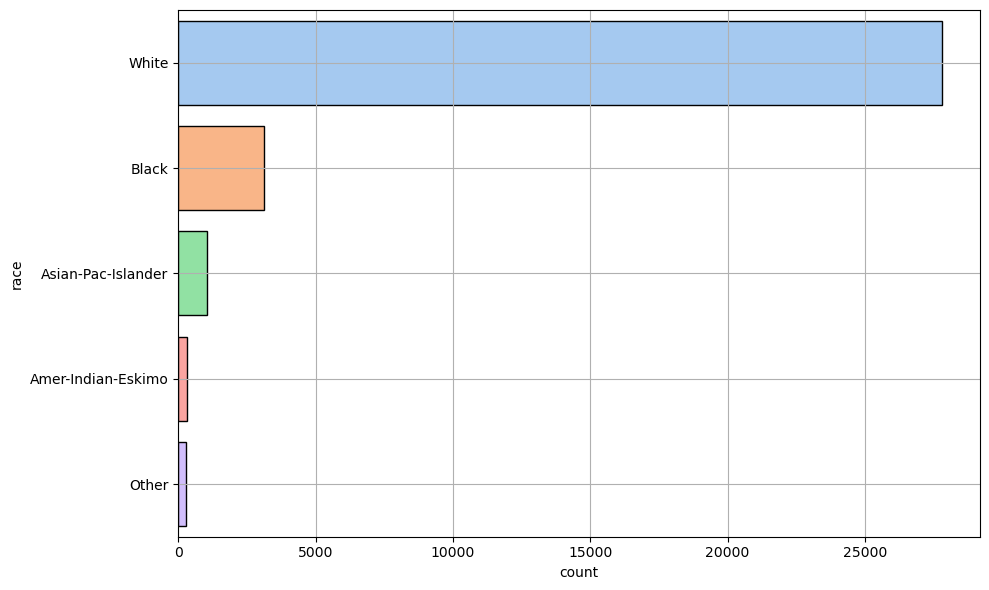

In [302]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['race'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

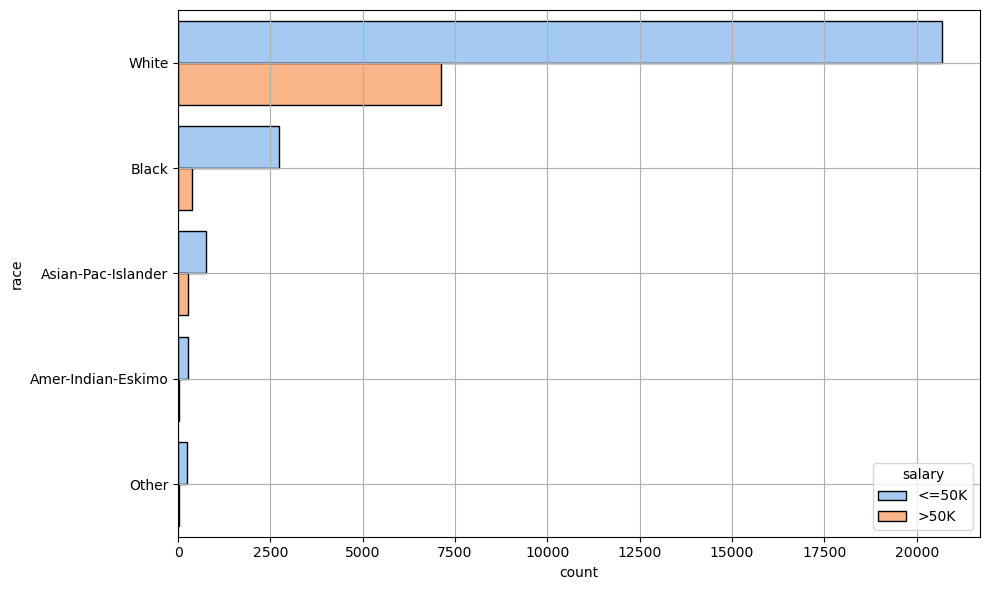

In [303]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['race'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

* Since the column for White exhibits a significantly higher distribution percentage compared to the others, it may not be particularly useful for prediction purposes. Therefore, we should consider dropping this column

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  country         32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


#### Sex

In [305]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

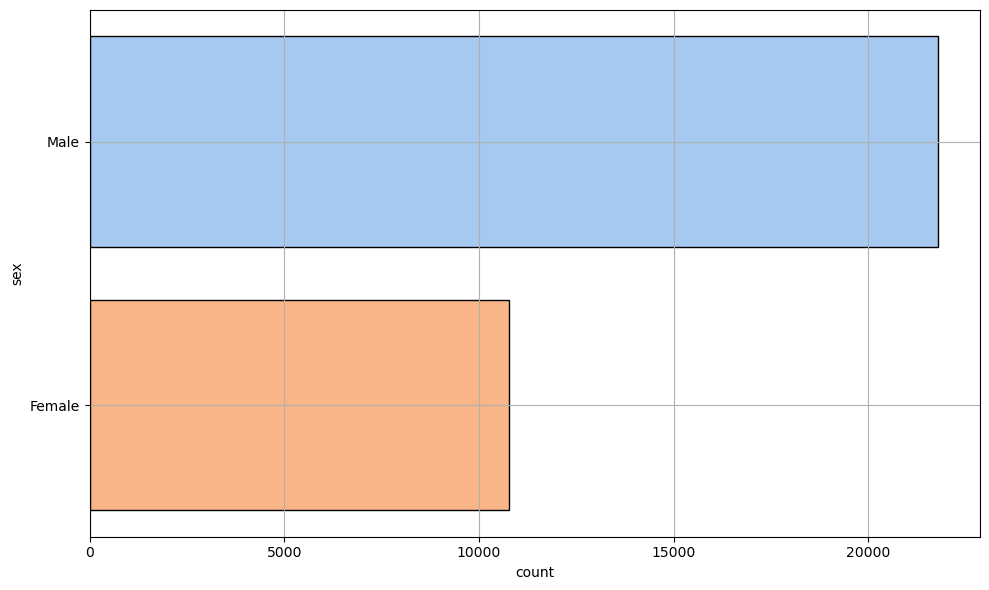

In [306]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['sex'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

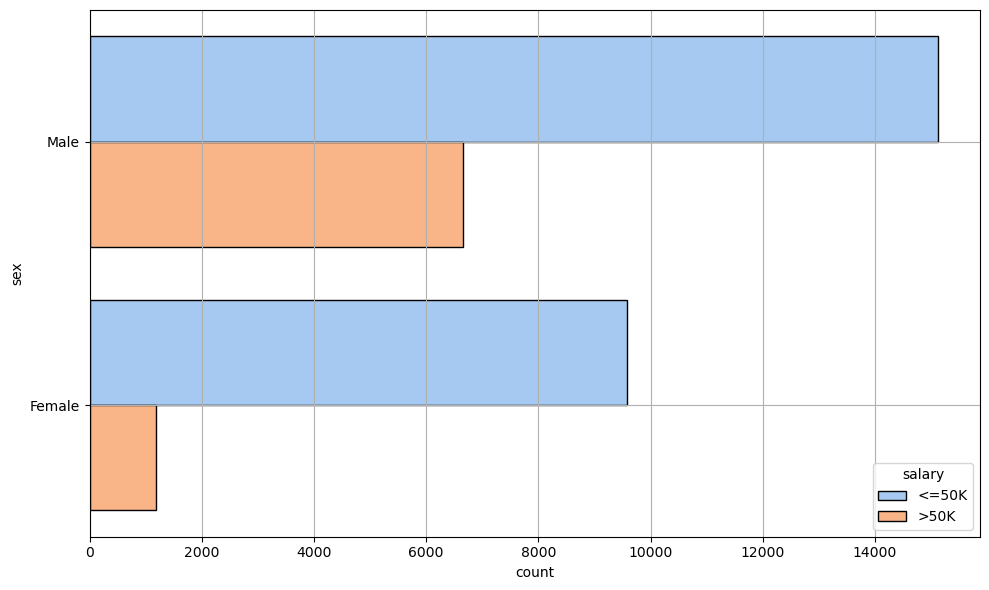

In [307]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['sex'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  country         32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


#### Capital-Gain

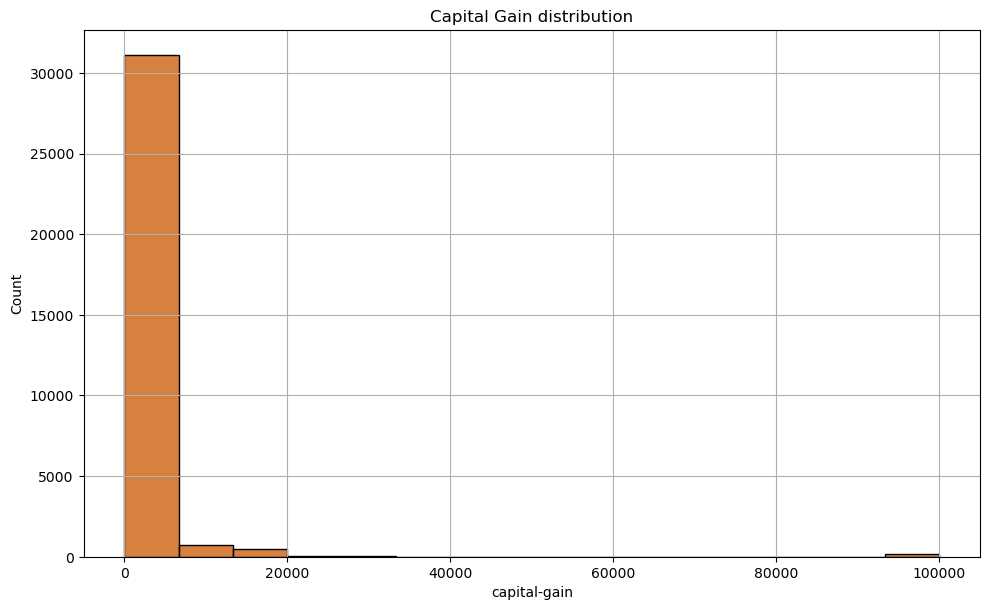

In [309]:
plt.figure(figsize=(10,6))
sns.histplot(df['capital-gain'],color='#CC5500',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Capital Gain distribution')
plt.show()

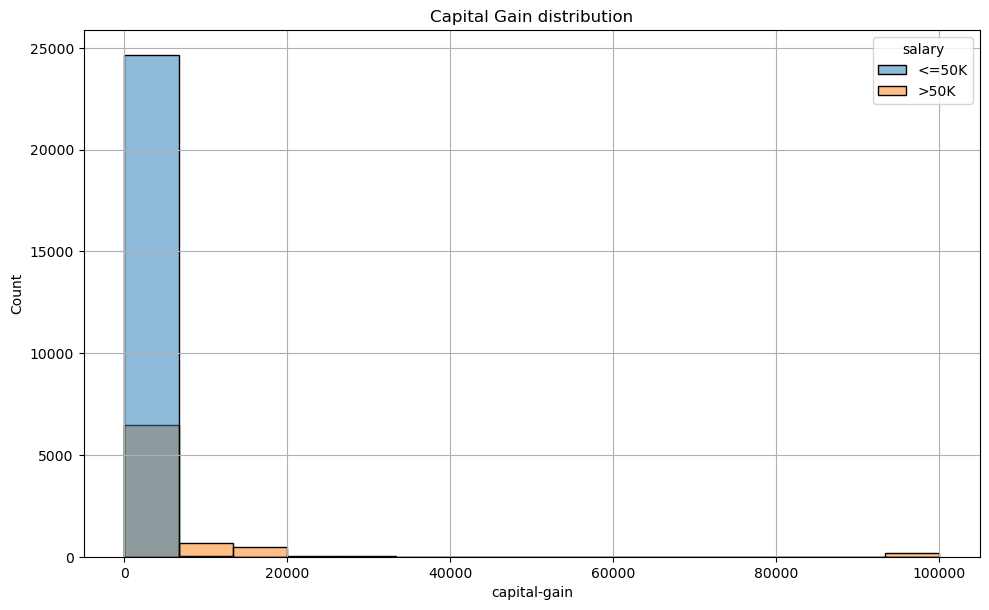

In [310]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['capital-gain'],hue=df['salary'],color='#CC5500',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Capital Gain distribution')
plt.show()

#### Capital-Loss

In [311]:
df['capital-loss']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: capital-loss, Length: 32537, dtype: int64

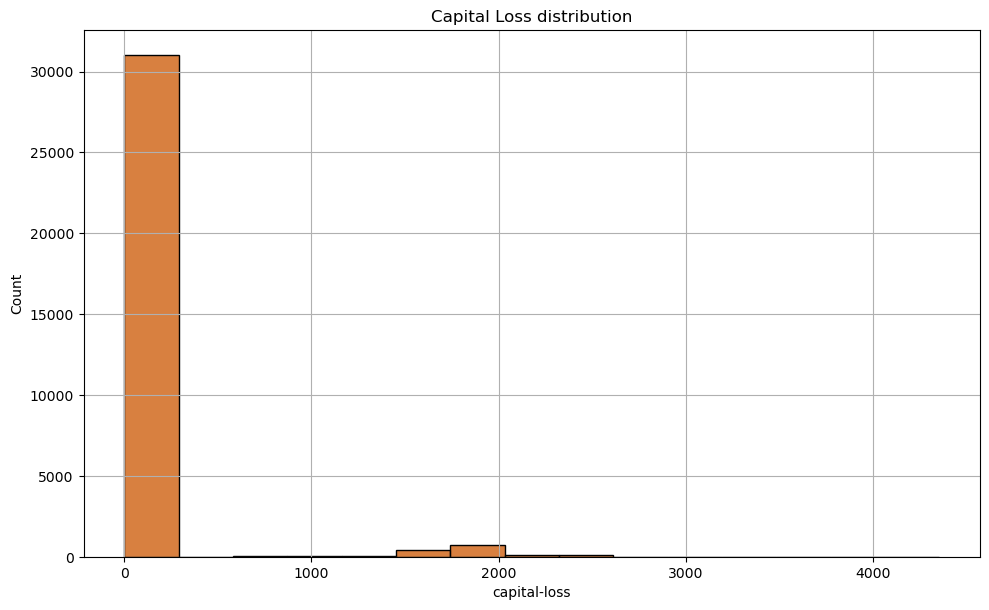

In [312]:
plt.figure(figsize=(10,6))
sns.histplot(df['capital-loss'],color='#CC5500',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Capital Loss distribution')
plt.show()

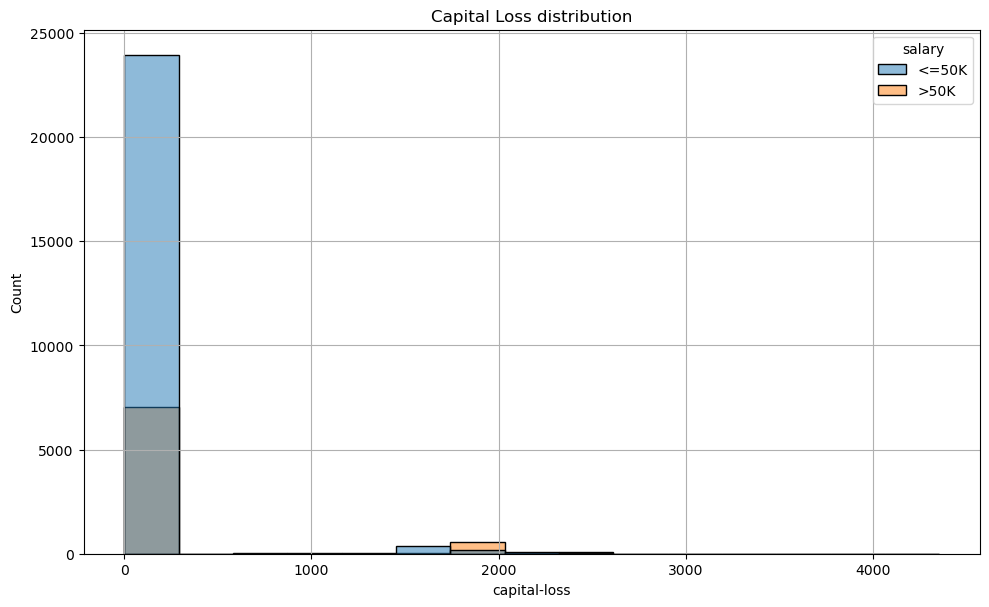

In [313]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['capital-loss'],hue=df['salary'],color='#CC5500',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Capital Loss distribution')
plt.show()

#### Hours-per-week

In [314]:
df['hours-per-week']

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: hours-per-week, Length: 32537, dtype: int64

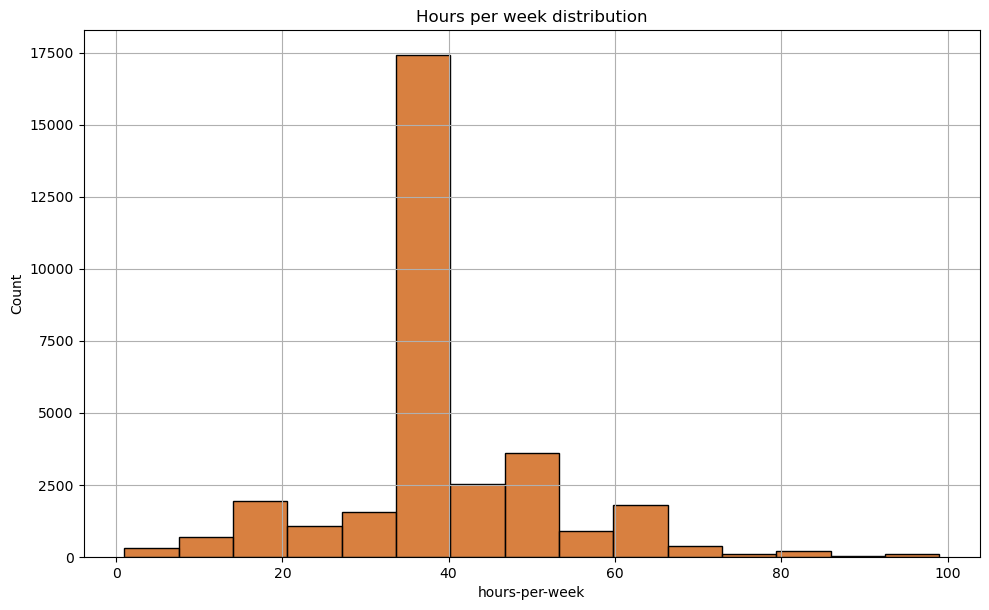

In [315]:
plt.figure(figsize=(10,6))
sns.histplot(df['hours-per-week'],color='#CC5500',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Hours per week distribution')
plt.show()

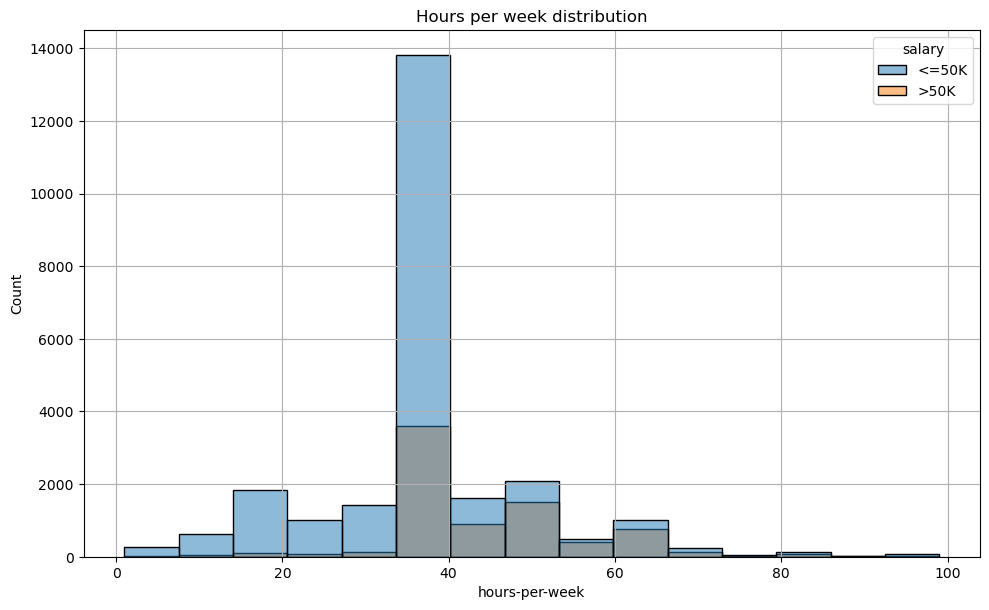

In [316]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['hours-per-week'],hue=df['salary'],color='#CC5500',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Hours per week distribution')
plt.show()

#### Country

In [317]:
df['country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

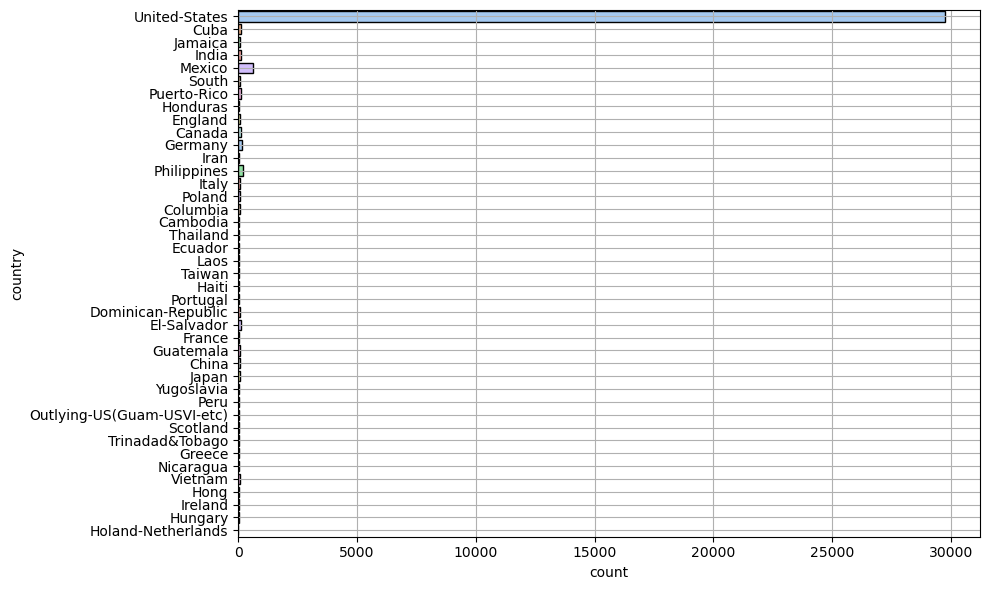

In [318]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['country'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

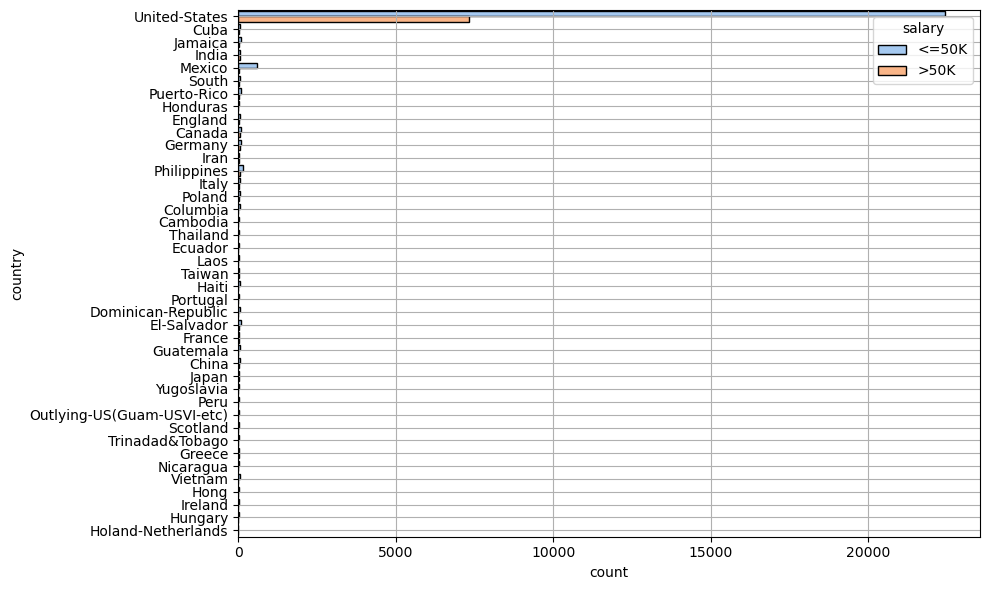

In [319]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['country'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [320]:
df['country'].replace(['United-States'], 'United-States', inplace=True)
df['country'].replace(['Cuba', 'Jamaica', 'India', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands'], 'Other-States', inplace=True)


In [321]:
df['country'].unique()

array(['United-States', 'Other-States'], dtype=object)

In [322]:
df['country'].value_counts()

United-States    29735
Other-States      2802
Name: country, dtype: int64

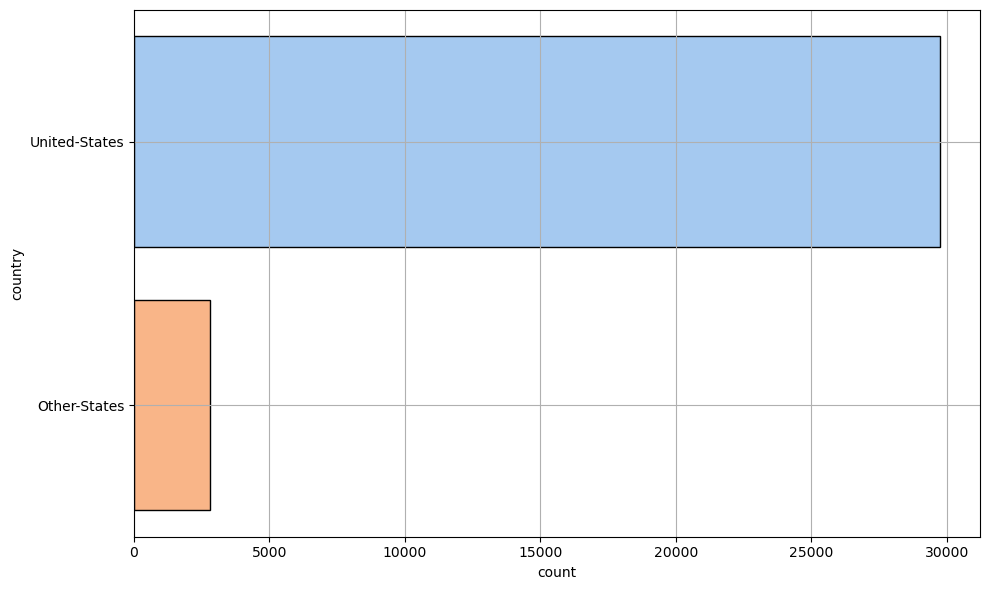

In [323]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['country'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

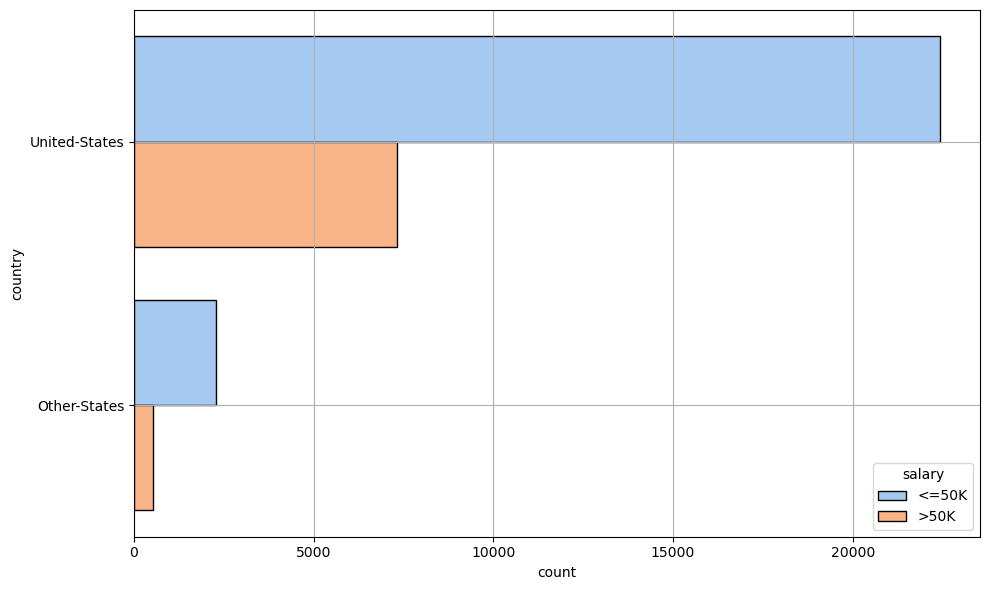

In [324]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['country'],hue=df['salary'],palette='pastel',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

Based on the graph, it is evident that the percentage of individuals from the United-States earning less than or equal to <=50k is lower than that of individuals from other states.

### Dropping the Columns

* education-num
* relationship
* race

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  country         32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [326]:
df.drop(['race','relationship','education-num'],axis=1,inplace=True)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   marital-status  32537 non-null  object
 5   occupation      32537 non-null  object
 6   sex             32537 non-null  object
 7   capital-gain    32537 non-null  int64 
 8   capital-loss    32537 non-null  int64 
 9   hours-per-week  32537 non-null  int64 
 10  country         32537 non-null  object
 11  salary          32537 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.2+ MB


In [328]:
df.rename(columns={'capital-gain':'capital_gain','capital-loss':'capital_loss','hours-per-week':'hours_per_week','marital-status':'marital_status'},inplace=True)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   marital_status  32537 non-null  object
 5   occupation      32537 non-null  object
 6   sex             32537 non-null  object
 7   capital_gain    32537 non-null  int64 
 8   capital_loss    32537 non-null  int64 
 9   hours_per_week  32537 non-null  int64 
 10  country         32537 non-null  object
 11  salary          32537 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.2+ MB


In [330]:
# df.to_csv("census.csv",index=False)

In [2]:
df1=pd.read_csv('census.csv')

In [3]:
df1.head()

,age,workclass,fnlwgt,education,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Graduate,Single,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Without-pay,83311,Graduate,Married,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Other-service,Male,0,0,40,United-States,<=50K
3,53,Private,234721,JR-grad,Married,Other-service,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Graduate,Married,Prof-specialty,Female,0,0,40,Other-States,<=50K


In [ ]:
less_50K = df1[df1['salary']=='<=50K'].shape[0]
greater_50K= df1[df1['salary']=='>50K'].shape[0]
print("<=50K: " + str(less_50K) + ", >50K: " + str(greater_50K))
sns.catplot(data=df1, x="salary", kind="count", palette="winter_r", alpha=.6)
plt.show()

In [5]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [6]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list)), columns=['Model Name']).sort_values(by=["Model Name"])
        
    return report

In [7]:
# print('Numerical_features',Numerical_features)
# print('Categorical_features',Categorical_features)

In [8]:
numeric_features=['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical_features=['workclass', 'education', 'marital_status', 'occupation', 'sex', 'country']

In [9]:
# Numerical and Categorical Pipeline Transformation
numeric_transformer= Pipeline(steps=[('scaler',  RobustScaler())])
categorical_transformer = Pipeline(steps=[ ('onehot', OneHotEncoder(sparse=True, handle_unknown='ignore'))])

In [10]:
# Numerical and Categorical Column Transformation
transformer = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                                ('cat', categorical_transformer, categorical_features)])

In [11]:
# Splitting X and y for all Experiments
X= df1.drop('salary', axis=1)
y = df1['salary']

In [12]:
X.head()

,age,workclass,fnlwgt,education,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,country
0,39,State-gov,77516,Graduate,Single,Adm-clerical,Male,2174,0,40,United-States
1,50,Without-pay,83311,Graduate,Married,Exec-managerial,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,Divorced,Other-service,Male,0,0,40,United-States
3,53,Private,234721,JR-grad,Married,Other-service,Male,0,0,40,United-States
4,28,Private,338409,Graduate,Married,Prof-specialty,Female,0,0,40,Other-States


In [13]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32532    <=50K
32533     >50K
32534    <=50K
32535    <=50K
32536     >50K
Name: salary, Length: 32537, dtype: object

In [14]:
X=transformer.fit_transform(X)

In [15]:
labelencode=LabelEncoder()
y=labelencode.fit_transform(y)

In [16]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

In [17]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [18]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9998
- Recall: 0.9999
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9151
- F1 score: 0.9162
- Precision: 0.8967
- Recall: 0.9367
- Roc Auc Score: 0.9153


Decision Tree
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9997
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.8727
- F1 score: 0.8732
- Precision: 0.8628
- Recall: 0.8838
- Roc Auc Score: 0.8728


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8743
- F1 score: 0.8780
- Precision: 0.8543
- Recall: 0.9031
- Roc Auc Score: 0.8742
----------------------------------
Model performance for Test set
- Accuracy: 0.8744
- F1 score: 0.8777
- Precision: 0.8484
- Recall: 0.9090
- Roc Auc Score: 0.8747


Logistic Regression
Model performance for Training 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)


xgb_model=XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_train=xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

In [27]:
print("Final XGBoost Classifier Accuracy Score (Train) :", accuracy_score(y_pred_train,y_train))
print("Final XGBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred_test,y_test))
print("Final XGBoost Classifier F1_score (Train) :",f1_score(y_pred_train,y_train))
print("Final XGBoost Classifier F1_score (Test) :",f1_score(y_pred_test,y_test))

Final XGBoost Classifier Accuracy Score (Train) : 0.935598111227702
Final XGBoost Classifier Accuracy Score (Test) : 0.9179433368310598
Final XGBoost Classifier F1_score (Train) : 0.9357447588138299
Final XGBoost Classifier F1_score (Test) : 0.9180121618788004


In [28]:
clf_report_train=classification_report(y_pred_train,y_train)
print(clf_report_train)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     19014
           1       0.94      0.94      0.94     19106

    accuracy                           0.94     38120
   macro avg       0.94      0.94      0.94     38120
weighted avg       0.94      0.94      0.94     38120



In [29]:
clf_report_test=classification_report(y_pred_test,y_test)
print(clf_report_test)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4716
           1       0.93      0.91      0.92      4814

    accuracy                           0.92      9530
   macro avg       0.92      0.92      0.92      9530
weighted avg       0.92      0.92      0.92      9530



## The best Model is XGBoost Classifier on train data with 93.5% accuracy 
## The best Model is XGBoost Classifier on test data with 91.7% accuracy 

In [30]:
import joblib

xgb_model_path = 'xgb_model.joblib'
transformer_path = 'transformer.joblib'
labelencode_path = 'labelencode.joblib'

joblib.dump(xgb, xgb_model_path)
joblib.dump(transformer, transformer_path)
joblib.dump(labelencode, labelencode_path)

['labelencode.joblib']

In [35]:
model = joblib.load(xgb_model_path)

In [36]:
transformer = joblib.load(transformer_path)

In [37]:
target = joblib.load(labelencode_path)

In [43]:
# Example input data (adjust this according to your actual data)
input_data = {
    'age': [43],
    'workclass': ['Private'],
    'fnlwgt': [237993],
    'education': ['JR-grad'],
    'marital_status': ['Married'],
    'occupation': ['Prof-specialty'],
    'sex': ['Male'],
    'capital_gain': [0],
    'capital_loss': [0],
    'hours_per_week': [40],
    'country': ['United-States']
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame(input_data)
# Transform the input data
transformed_data = transformer.transform(input_df)
# Make predictions
predictions = model.predict(transformed_data)
# Display predictions
print(predictions)


[1]


In [45]:
prediction_text = ">50K" if predictions[0] == 1 else "<=50K"
print(prediction_text)

>50K
